# Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import yaml
import warnings

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced

import joblib

#warnings.filterwarnings("ignore")

# Lecture du fichier data_cleaned_final_sans_dummies.csv

In [2]:
file = open('../../../conf/global_conf.yml', 'r') 
conf = yaml.safe_load(file)
df = pd.read_csv(conf['local_data_path'] + "data_cleaned_final_sans_dummies.csv",index_col=0,low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447136 entries, 0 to 494017
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   jour            447136 non-null  int64  
 1   mois            447136 non-null  int64  
 2   an              447136 non-null  int64  
 3   lum             447136 non-null  float64
 4   dep             447136 non-null  object 
 5   agg             447136 non-null  int64  
 6   int             447136 non-null  float64
 7   atm             447136 non-null  float64
 8   col             447136 non-null  float64
 9   lat             447136 non-null  float64
 10  long            447136 non-null  float64
 11  catr            447136 non-null  int64  
 12  circ            447136 non-null  float64
 13  prof            447136 non-null  float64
 14  plan            447136 non-null  float64
 15  surf            447136 non-null  float64
 16  infra           447136 non-null  float64
 17  situ           

In [4]:
cat = ['lum', 'agg', 'int', 'atm', 'col', 'catr', 'circ',
       'prof', 'plan', 'surf', 'infra', 'situ', 'grav', 'sexe', 'catv', 'obs',
       'obsm', 'manv', 'motor', 'weekend', 'place_rec',
       'eq_ceinture', 'eq_casque', 'eq_siege', 'eq_gilet', 'eq_airbag',
       'eq_gants', 'eq_indetermine', 'eq_autre', 'jour_chome', 'prox_pt_choc']
df[cat] = df[cat].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447136 entries, 0 to 494017
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   jour            447136 non-null  int64  
 1   mois            447136 non-null  int64  
 2   an              447136 non-null  int64  
 3   lum             447136 non-null  int64  
 4   dep             447136 non-null  object 
 5   agg             447136 non-null  int64  
 6   int             447136 non-null  int64  
 7   atm             447136 non-null  int64  
 8   col             447136 non-null  int64  
 9   lat             447136 non-null  float64
 10  long            447136 non-null  float64
 11  catr            447136 non-null  int64  
 12  circ            447136 non-null  int64  
 13  prof            447136 non-null  int64  
 14  plan            447136 non-null  int64  
 15  surf            447136 non-null  int64  
 16  infra           447136 non-null  int64  
 17  situ           

# Séparation en train et test

Suppression des colonnes qui ne serviront pas pour la modélisation

In [5]:
df = df.drop(['an', 'jour', 'grav_rec', 'date', 'dep'], axis = 1)

Séparation des données de la cible

In [6]:
X = df.drop('grav', axis = 1)
y = df['grav']

y.value_counts(normalize = True)

grav
1    0.412733
4    0.403430
3    0.156550
2    0.027287
Name: proportion, dtype: float64

Séparation en train et test en gardant la même porportion de chque modalité de la cible dans les jeux d'entraînement et de test.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

grav
1    0.412733
4    0.403430
3    0.156549
2    0.027288
Name: proportion, dtype: float64
grav
1    0.412733
4    0.403430
3    0.156552
2    0.027285
Name: proportion, dtype: float64


In [8]:
X_train.shape

(335352, 35)

# Création de train et test avec Oversampling et Undersampling

### Oversampling

Avec SMOTE

In [9]:
df.columns

Index(['mois', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long', 'catr',
       'circ', 'prof', 'plan', 'surf', 'infra', 'situ', 'grav', 'sexe', 'catv',
       'obs', 'obsm', 'manv', 'motor', 'weekend', 'heure', 'place_rec',
       'age_usager', 'eq_ceinture', 'eq_casque', 'eq_siege', 'eq_gilet',
       'eq_airbag', 'eq_gants', 'eq_indetermine', 'eq_autre', 'jour_chome',
       'prox_pt_choc'],
      dtype='object')

In [10]:
cat = ['lum', 'agg', 'int', 'atm', 'col', 'catr', 'circ',
       'prof', 'plan', 'surf', 'infra', 'situ', 'sexe', 'catv', 'obs',
       'obsm', 'manv', 'motor', 'weekend', 'place_rec',
       'eq_ceinture', 'eq_casque', 'eq_siege', 'eq_gilet', 'eq_airbag',
       'eq_gants', 'eq_indetermine', 'eq_autre', 'jour_chome', 'prox_pt_choc']
smo = SMOTENC(categorical_features = cat)
X_train_sm, y_train_sm = smo.fit_resample(X_train, y_train)
print('Classes échantillon SMOTE :', dict(pd.Series(y_train_sm).value_counts()))

Classes échantillon SMOTE : {4: 138411, 3: 138411, 1: 138411, 2: 138411}


Avec RandomOverSampler

In [11]:
rOs = RandomOverSampler()
X_train_ro, y_train_ro = rOs.fit_resample(X_train, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_train_ro).value_counts()))

Classes échantillon oversampled : {4: 138411, 3: 138411, 1: 138411, 2: 138411}


### Undersampling

Avec RandomUnderSampler

In [12]:
rUs = RandomUnderSampler()
X_train_ru, y_train_ru = rUs.fit_resample(X_train, y_train)
print('Classes échantillon undersampled :', dict(pd.Series(y_train_ru).value_counts()))

Classes échantillon undersampled : {1: 9151, 2: 9151, 3: 9151, 4: 9151}


Avec ClusterCentroids

In [13]:
cc = ClusterCentroids()
X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)
print('Classes échantillon CC :', dict(pd.Series(y_train_cc).value_counts()))

Classes échantillon CC : {1: 9151, 2: 9151, 3: 9151, 4: 9151}


# Decision Tree

### Selection des variables

In [14]:
dt = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)

In [15]:
print("Train acuracy :", np.round(dt.score(X_train, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(dt.score(X_test, y_test) * 100, 2), "%")
print()
y_pred = dt.predict(X_test)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.9 %
Test acuracy :  56.91 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,31159,430,2740,11808
2,429,496,1145,980
3,2776,1265,6574,6885
4,11650,1055,7001,25391



Rapport de classification :
               precision    recall  f1-score   support

           1       0.68      0.68      0.68     46137
           2       0.15      0.16      0.16      3050
           3       0.38      0.38      0.38     17500
           4       0.56      0.56      0.56     45097

    accuracy                           0.57    111784
   macro avg       0.44      0.44      0.44    111784
weighted avg       0.57      0.57      0.57    111784



Calcul de l'importance de chaque variable

In [16]:
importances_dt = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dt.feature_importances_,3)})
importances_dt = importances_dt.sort_values('importance',ascending=False).set_index('feature')
importances_dt.head(38)

,importance
feature,
lat,0.131
long,0.123
age_usager,0.113
eq_ceinture,0.095
heure,0.068
mois,0.057
col,0.039
place_rec,0.038
obs,0.032


In [17]:
importances_dt.shape

(35, 1)

Recherche du nombre de variables permettant d'obtenir la meilleur accuracy

In [18]:
nombre_variable = []
scores = []

for i in np.arange(1, len(importances_dt), 1):
    liste_var = importances_dt.index[0 : i]
    X_train_2 = X_train[liste_var]
    X_test_2 = X_test[liste_var]

    dt_2 = DecisionTreeClassifier(random_state = 42).fit(X_train_2, y_train)

    score = dt_2.score(X_test_2, y_test)
    
    nombre_variable.append(i)
    scores.append(score)
 
dico = {'nombre_variable' : nombre_variable,
        'scores' : scores}   

y_pred_tableau_dt = pd.DataFrame(dico)
y_pred_tableau_dt = y_pred_tableau_dt.sort_values(by = 'scores', ascending = False)
y_pred_tableau_dt.head(5)

,nombre_variable,scores
30,31,0.570153
33,34,0.569411
28,29,0.569303
29,30,0.568999
23,24,0.568606


In [19]:
nb_variable_dt = y_pred_tableau_dt.iloc[0]['nombre_variable']
print("La meilleur accuracy est obtenue avec", nb_variable_dt, 'variables')

La meilleur accuracy est obtenue avec 31.0 variables


In [20]:
meilleurs_variables_dt = importances_dt.index[0 : int(nb_variable_dt)]
meilleurs_variables_dt

Index(['lat', 'long', 'age_usager', 'eq_ceinture', 'heure', 'mois', 'col',
       'place_rec', 'obs', 'agg', 'obsm', 'catr', 'catv', 'manv', 'lum',
       'infra', 'sexe', 'circ', 'motor', 'weekend', 'situ', 'eq_indetermine',
       'jour_chome', 'prox_pt_choc', 'prof', 'int', 'plan', 'surf', 'atm',
       'eq_casque', 'eq_airbag'],
      dtype='object', name='feature')

In [21]:
liste_var = importances_dt.index[0 : int(nb_variable_dt)]
X_train_dt = X_train[liste_var]
X_test_dt = X_test[liste_var]

dt = DecisionTreeClassifier(random_state = 42).fit(X_train_dt, y_train)

In [22]:
print("Train acuracy :", np.round(dt.score(X_train_dt, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(dt.score(X_test_dt, y_test) * 100, 2), "%")
print()
y_pred = dt.predict(X_test_dt)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.9 %
Test acuracy :  57.02 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,31143,430,2727,11837
2,427,511,1125,987
3,2740,1303,6600,6857
4,11536,1049,7032,25480



Rapport de classification :
               precision    recall  f1-score   support

           1       0.68      0.68      0.68     46137
           2       0.16      0.17      0.16      3050
           3       0.38      0.38      0.38     17500
           4       0.56      0.57      0.56     45097

    accuracy                           0.57    111784
   macro avg       0.44      0.45      0.45    111784
weighted avg       0.57      0.57      0.57    111784



### Hyperparamétrage

In [9]:
liste_var_dt = ['lat', 'long', 'age_usager', 'eq_ceinture', 'heure', 'mois', 'col',
       'place_rec', 'obs', 'agg', 'obsm', 'catr', 'catv', 'manv', 'lum',
       'infra', 'sexe', 'circ', 'motor', 'weekend', 'situ', 'eq_indetermine',
       'jour_chome', 'prox_pt_choc', 'prof', 'int', 'plan', 'surf', 'atm',
       'eq_casque', 'eq_airbag']
X_train_dt = X_train[liste_var_dt]
X_test_dt = X_test[liste_var_dt]

dt = DecisionTreeClassifier(random_state = 42).fit(X_train_dt, y_train)

##### Avec class_weight = None

In [24]:
params_dt = {'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20], 
            'min_samples_leaf' : [1, 10, 20, 30], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : [None],
            }

In [25]:
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5).fit(X_train_dt, y_train)
print(pd.DataFrame.from_dict(grid_dt.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'class_weight': None, 'criterion': 'gini', 'm...         0.624407
1    {'class_weight': None, 'criterion': 'gini', 'm...         0.611036
2    {'class_weight': None, 'criterion': 'gini', 'm...         0.619302
3    {'class_weight': None, 'criterion': 'gini', 'm...         0.607899
4    {'class_weight': None, 'criterion': 'gini', 'm...         0.617957
..                                                 ...              ...
139  {'class_weight': None, 'criterion': 'entropy',...         0.629154
140  {'class_weight': None, 'criterion': 'entropy',...         0.630305
141  {'class_weight': None, 'criterion': 'entropy',...         0.629154
142  {'class_weight': None, 'criterion': 'entropy',...         0.630305
143  {'class_weight': None, 'criterion': 'entropy',...         0.629154

[144 rows x 2 columns]


In [26]:
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.6305583464526798


In [27]:
print("Train acuracy :", np.round(grid_dt.score(X_train_dt, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_dt.score(X_test_dt, y_test) * 100, 2), "%")
print()
y_pred = grid_dt.predict(X_test_dt)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 65.88 %
Test acuracy :  63.35 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37217,25,1244,7651
2,522,146,1381,1001
3,2920,197,6299,8084
4,13552,79,4314,27152



Rapport de classification :
               precision    recall  f1-score   support

           1       0.69      0.81      0.74     46137
           2       0.33      0.05      0.08      3050
           3       0.48      0.36      0.41     17500
           4       0.62      0.60      0.61     45097

    accuracy                           0.63    111784
   macro avg       0.53      0.45      0.46    111784
weighted avg       0.62      0.63      0.62    111784



Recherche du meilleur max_depth

In [125]:
params_dt = {'criterion' : ['entropy'],
            'splitter' : ['best'],
            'max_depth' : [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
            'min_samples_split' : [2], 
            'min_samples_leaf' : [30], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : [None],
            }

grid_dt_2 = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5, scoring = 'f1_macro').fit(X_train_dt, y_train)

In [126]:
print(grid_dt_2.best_params_)
print(grid_dt_2.best_score_)

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.4585894311180894


In [127]:
y_train_pred = grid_dt_2.predict(X_train_dt)
y_test_pred = grid_dt_2.predict(X_test_dt)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 65.9 %
Test acuracy :  63.43 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37197,31,1250,7659
2,480,158,1412,1000
3,2898,159,6408,8035
4,13619,82,4249,27147



Rapport de classification :
               precision    recall  f1-score   support

           1       0.69      0.81      0.74     46137
           2       0.37      0.05      0.09      3050
           3       0.48      0.37      0.42     17500
           4       0.62      0.60      0.61     45097

    accuracy                           0.63    111784
   macro avg       0.54      0.46      0.46    111784
weighted avg       0.62      0.63      0.62    111784



##### Avec class_weight = 'balanced'

In [ ]:
params_dt = {'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20], 
            'min_samples_leaf' : [1, 10, 20, 30], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : ['balanced'],
            }

In [29]:
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5).fit(X_train_dt, y_train)
print(pd.DataFrame.from_dict(grid_dt.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'class_weight': 'balanced', 'criterion': 'gin...         0.537444
1    {'class_weight': 'balanced', 'criterion': 'gin...         0.519788
2    {'class_weight': 'balanced', 'criterion': 'gin...         0.539329
3    {'class_weight': 'balanced', 'criterion': 'gin...         0.513171
4    {'class_weight': 'balanced', 'criterion': 'gin...         0.534737
..                                                 ...              ...
139  {'class_weight': 'balanced', 'criterion': 'ent...         0.530824
140  {'class_weight': 'balanced', 'criterion': 'ent...         0.532852
141  {'class_weight': 'balanced', 'criterion': 'ent...         0.530824
142  {'class_weight': 'balanced', 'criterion': 'ent...         0.532852
143  {'class_weight': 'balanced', 'criterion': 'ent...         0.530824

[144 rows x 2 columns]


In [30]:
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.5669386480078391


In [31]:
print("Train acuracy :", np.round(grid_dt.score(X_train_dt, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_dt.score(X_test_dt, y_test) * 100, 2), "%")
print()
y_pred = grid_dt.predict(X_test_dt)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 74.13 %
Test acuracy :  56.93 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,33810,1393,3249,7685
2,357,1008,1084,601
3,2129,3337,7162,4872
4,12107,2624,8709,21657



Rapport de classification :
               precision    recall  f1-score   support

           1       0.70      0.73      0.72     46137
           2       0.12      0.33      0.18      3050
           3       0.35      0.41      0.38     17500
           4       0.62      0.48      0.54     45097

    accuracy                           0.57    111784
   macro avg       0.45      0.49      0.45    111784
weighted avg       0.60      0.57      0.58    111784



Recherche du meilleur max_depth

In [66]:
params_dt = {'criterion' : ['gini'],
            'splitter' : ['best'],
            'max_depth' : [10, 12, 14, 16, 18, 20, 22],
            'min_samples_split' : [2,], 
            'min_samples_leaf' : [1], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : ['balanced'],
            }

grid_dt_2 = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5, scoring = 'f1_macro').fit(X_train_dt, y_train)

In [67]:
print(grid_dt_2.best_params_)
print(grid_dt_2.best_score_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.4505325575761351


In [68]:
y_train_pred = grid_dt_2.predict(X_train_dt)
y_test_pred = grid_dt_2.predict(X_test_dt)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 74.13 %
Test acuracy :  56.93 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,33810,1393,3249,7685
2,357,1008,1084,601
3,2129,3337,7162,4872
4,12107,2624,8709,21657



Rapport de classification :
               precision    recall  f1-score   support

           1       0.70      0.73      0.72     46137
           2       0.12      0.33      0.18      3050
           3       0.35      0.41      0.38     17500
           4       0.62      0.48      0.54     45097

    accuracy                           0.57    111784
   macro avg       0.45      0.49      0.45    111784
weighted avg       0.60      0.57      0.58    111784



##### Recherche du meilleur class_weight

In [32]:
params_dt = {'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20],
              'min_samples_leaf' : [1, 10, 20],
            'max_features' : [None],
            'random_state' : [42],
            'class_weight' : [{1: 1, 2: 4, 3: 1, 4: 1}]
            }

In [33]:
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5).fit(X_train_dt, y_train)
print(pd.DataFrame.from_dict(grid_dt.cv_results_).loc[:, ['params', 'mean_test_score']])

                                              params  mean_test_score
0  {'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'cr...         0.625990
1  {'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'cr...         0.605522
2  {'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'cr...         0.562776
3  {'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'cr...         0.622916
4  {'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'cr...         0.597814
5  {'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'cr...         0.562588


In [34]:
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.6259900076247786


In [35]:
print("Train acuracy :", np.round(grid_dt.score(X_train_dt, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_dt.score(X_test_dt, y_test) * 100, 2), "%")
print()
y_pred = grid_dt.predict(X_test_dt)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 63.79 %
Test acuracy :  62.9 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37131,880,644,7482
2,363,1188,656,843
3,2294,3103,4121,7982
4,12662,1901,2667,27867



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.80      0.75     46137
           2       0.17      0.39      0.23      3050
           3       0.51      0.24      0.32     17500
           4       0.63      0.62      0.62     45097

    accuracy                           0.63    111784
   macro avg       0.50      0.51      0.48    111784
weighted avg       0.63      0.63      0.62    111784



Sélection du meilleur max_depth

In [10]:
params_dt = {'criterion' : ['gini'],
            'splitter' : ['best'],
            'max_depth' : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            'min_samples_split' : [2],
              'min_samples_leaf' : [1],
            'max_features' : [None],
            'random_state' : [42],
            'class_weight' : [{1: 1, 2: 4, 3: 1, 4: 1}]
            }

grid_dt_2 = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5, scoring = 'f1_macro').fit(X_train_dt, y_train)

In [11]:
print(grid_dt_2.best_params_)
print(grid_dt_2.best_score_)

{'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.48446600900979897


In [12]:
y_train_pred = grid_dt_2.predict(X_train_dt)
y_test_pred = grid_dt_2.predict(X_test_dt)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 65.54 %
Test acuracy :  62.78 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37306,816,853,7162
2,358,1151,758,783
3,2372,3103,4419,7606
4,12733,2003,3055,27306



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.81      0.75     46137
           2       0.16      0.38      0.23      3050
           3       0.49      0.25      0.33     17500
           4       0.64      0.61      0.62     45097

    accuracy                           0.63    111784
   macro avg       0.50      0.51      0.48    111784
weighted avg       0.63      0.63      0.62    111784



In [13]:
print(classification_report_imbalanced(y_test, y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.71      0.81      0.76      0.75      0.79      0.62     46137
          2       0.16      0.38      0.95      0.23      0.60      0.34      3050
          3       0.49      0.25      0.95      0.33      0.49      0.22     17500
          4       0.64      0.61      0.77      0.62      0.68      0.46     45097

avg / total       0.63      0.63      0.80      0.62      0.69      0.48    111784



##### Avec SMOTENC

In [73]:
liste_var_dt = ['lat', 'long', 'age_usager', 'eq_ceinture', 'heure', 'mois', 'col',
       'place_rec', 'obs', 'agg', 'obsm', 'catr', 'catv', 'manv', 'lum',
       'infra', 'sexe', 'circ', 'motor', 'weekend', 'situ', 'eq_indetermine',
       'jour_chome', 'prox_pt_choc', 'prof', 'int', 'plan', 'surf', 'atm',
       'eq_casque', 'eq_airbag']
X_train_sm_dt = X_train_sm[liste_var_dt]
X_test_dt = X_test[liste_var_dt]

dt = DecisionTreeClassifier(random_state = 42).fit(X_train_sm_dt, y_train_sm)

In [37]:
params_dt = {'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20], 
            'min_samples_leaf' : [1, 10, 20, 30], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : [None],
            }

In [38]:
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5).fit(X_train_sm_dt, y_train_sm)
print(pd.DataFrame.from_dict(grid_dt.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'class_weight': None, 'criterion': 'gini', 'm...         0.548560
1    {'class_weight': None, 'criterion': 'gini', 'm...         0.515347
2    {'class_weight': None, 'criterion': 'gini', 'm...         0.545323
3    {'class_weight': None, 'criterion': 'gini', 'm...         0.524570
4    {'class_weight': None, 'criterion': 'gini', 'm...         0.549478
..                                                 ...              ...
139  {'class_weight': None, 'criterion': 'entropy',...         0.576298
140  {'class_weight': None, 'criterion': 'entropy',...         0.608526
141  {'class_weight': None, 'criterion': 'entropy',...         0.576298
142  {'class_weight': None, 'criterion': 'entropy',...         0.608526
143  {'class_weight': None, 'criterion': 'entropy',...         0.576298

[144 rows x 2 columns]


In [39]:
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}
0.6613167086766364


In [40]:
print("Train acuracy :", np.round(grid_dt.score(X_train_sm_dt, y_train_sm) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_dt.score(X_test_dt, y_test) * 100, 2), "%")
print()
y_pred = grid_dt.predict(X_test_dt)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.94 %
Test acuracy :  53.17 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,29907,1021,3879,11330
2,385,704,1151,810
3,2497,2237,6707,6059
4,11285,2294,9402,22116



Rapport de classification :
               precision    recall  f1-score   support

           1       0.68      0.65      0.66     46137
           2       0.11      0.23      0.15      3050
           3       0.32      0.38      0.35     17500
           4       0.55      0.49      0.52     45097

    accuracy                           0.53    111784
   macro avg       0.41      0.44      0.42    111784
weighted avg       0.55      0.53      0.54    111784



Recherche du meilleur max_depth

In [74]:
params_dt = {'criterion' : ['gini'],
            'splitter' : ['random'],
            'max_depth' : [10, 20, 30, 40, 50, 60, 70],
            'min_samples_split' : [2], 
            'min_samples_leaf' : [1], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : [None],
            }

grid_dt_2 = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5, scoring = 'f1_macro').fit(X_train_sm_dt, y_train_sm)

In [75]:
print(grid_dt_2.best_params_)
print(grid_dt_2.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}
0.6582830655884312


In [76]:
y_train_pred = grid_dt_2.predict(X_train_sm_dt)
y_test_pred = grid_dt_2.predict(X_test_dt)
print("Train acuracy :", np.round(accuracy_score(y_train_sm, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 99.94 %
Test acuracy :  53.17 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,29821,1027,3898,11391
2,374,718,1179,779
3,2344,2272,6809,6075
4,11056,2321,9631,22089



Rapport de classification :
               precision    recall  f1-score   support

           1       0.68      0.65      0.66     46137
           2       0.11      0.24      0.15      3050
           3       0.32      0.39      0.35     17500
           4       0.55      0.49      0.52     45097

    accuracy                           0.53    111784
   macro avg       0.42      0.44      0.42    111784
weighted avg       0.56      0.53      0.54    111784



##### Avec RandomOverSampler

In [77]:
liste_var_dt = ['lat', 'long', 'age_usager', 'eq_ceinture', 'heure', 'mois', 'col',
       'place_rec', 'obs', 'agg', 'obsm', 'catr', 'catv', 'manv', 'lum',
       'infra', 'sexe', 'circ', 'motor', 'weekend', 'situ', 'eq_indetermine',
       'jour_chome', 'prox_pt_choc', 'prof', 'int', 'plan', 'surf', 'atm',
       'eq_casque', 'eq_airbag']
X_train_ro_dt = X_train_ro[liste_var_dt]
X_test_dt = X_test[liste_var_dt]

dt = DecisionTreeClassifier(random_state = 42).fit(X_train_ro_dt, y_train_ro)

In [42]:
params_dt = {'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20], 
            'min_samples_leaf' : [1, 10, 20, 30], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : [None],
            }

In [43]:
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5).fit(X_train_ro_dt, y_train_ro)
print(pd.DataFrame.from_dict(grid_dt.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'class_weight': None, 'criterion': 'gini', 'm...         0.530935
1    {'class_weight': None, 'criterion': 'gini', 'm...         0.508910
2    {'class_weight': None, 'criterion': 'gini', 'm...         0.528379
3    {'class_weight': None, 'criterion': 'gini', 'm...         0.498582
4    {'class_weight': None, 'criterion': 'gini', 'm...         0.529223
..                                                 ...              ...
139  {'class_weight': None, 'criterion': 'entropy',...         0.558861
140  {'class_weight': None, 'criterion': 'entropy',...         0.615363
141  {'class_weight': None, 'criterion': 'entropy',...         0.558861
142  {'class_weight': None, 'criterion': 'entropy',...         0.615363
143  {'class_weight': None, 'criterion': 'entropy',...         0.558861

[144 rows x 2 columns]


In [44]:
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.7897728800144941


In [45]:
print("Train acuracy :", np.round(grid_dt.score(X_train_ro_dt, y_train_ro) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_dt.score(X_test_dt, y_test) * 100, 2), "%")
print()
y_pred = grid_dt.predict(X_test_dt)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.93 %
Test acuracy :  55.79 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,30753,405,2826,12153
2,442,445,1166,997
3,2860,1110,6237,7293
4,12230,898,7036,24933



Rapport de classification :
               precision    recall  f1-score   support

           1       0.66      0.67      0.67     46137
           2       0.16      0.15      0.15      3050
           3       0.36      0.36      0.36     17500
           4       0.55      0.55      0.55     45097

    accuracy                           0.56    111784
   macro avg       0.43      0.43      0.43    111784
weighted avg       0.56      0.56      0.56    111784



Recherche du meilleur max_depth

In [78]:
params_dt = {'criterion' : ['entropy'],
            'splitter' : ['best'],
            'max_depth' : [10, 20, 30, 40, 50, 60, 70],
            'min_samples_split' : [2], 
            'min_samples_leaf' : [1], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : [None],
            }

grid_dt_2 = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5, scoring = 'f1_macro').fit(X_train_ro_dt, y_train_ro)

In [79]:
print(grid_dt_2.best_params_)
print(grid_dt_2.best_score_)

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.7828215530113654


In [80]:
y_train_pred = grid_dt_2.predict(X_train_ro_dt)
y_test_pred = grid_dt_2.predict(X_test_dt)
print("Train acuracy :", np.round(accuracy_score(y_train_ro, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 99.69 %
Test acuracy :  55.75 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,30802,389,2918,12028
2,464,451,1168,967
3,2900,1163,6210,7227
4,12087,933,7216,24861



Rapport de classification :
               precision    recall  f1-score   support

           1       0.67      0.67      0.67     46137
           2       0.15      0.15      0.15      3050
           3       0.35      0.35      0.35     17500
           4       0.55      0.55      0.55     45097

    accuracy                           0.56    111784
   macro avg       0.43      0.43      0.43    111784
weighted avg       0.56      0.56      0.56    111784



##### Avec RandomUnderSampler

In [81]:
liste_var_dt = ['lat', 'long', 'age_usager', 'eq_ceinture', 'heure', 'mois', 'col',
       'place_rec', 'obs', 'agg', 'obsm', 'catr', 'catv', 'manv', 'lum',
       'infra', 'sexe', 'circ', 'motor', 'weekend', 'situ', 'eq_indetermine',
       'jour_chome', 'prox_pt_choc', 'prof', 'int', 'plan', 'surf', 'atm',
       'eq_casque', 'eq_airbag']
X_train_ru_dt = X_train_ru[liste_var_dt]
X_test_dt = X_test[liste_var_dt]

dt = DecisionTreeClassifier(random_state = 42).fit(X_train_ru_dt, y_train_ru)

In [47]:
params_dt = {'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20], 
            'min_samples_leaf' : [1, 10, 20, 30], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : [None],
            }

In [48]:
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5).fit(X_train_ru_dt, y_train_ru)
print(pd.DataFrame.from_dict(grid_dt.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'class_weight': None, 'criterion': 'gini', 'm...         0.500410
1    {'class_weight': None, 'criterion': 'gini', 'm...         0.481314
2    {'class_weight': None, 'criterion': 'gini', 'm...         0.493006
3    {'class_weight': None, 'criterion': 'gini', 'm...         0.480139
4    {'class_weight': None, 'criterion': 'gini', 'm...         0.500792
..                                                 ...              ...
139  {'class_weight': None, 'criterion': 'entropy',...         0.484155
140  {'class_weight': None, 'criterion': 'entropy',...         0.506283
141  {'class_weight': None, 'criterion': 'entropy',...         0.484155
142  {'class_weight': None, 'criterion': 'entropy',...         0.506283
143  {'class_weight': None, 'criterion': 'entropy',...         0.484155

[144 rows x 2 columns]


In [49]:
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.5062834551104205


In [50]:
print("Train acuracy :", np.round(grid_dt.score(X_train_ru_dt, y_train_ru) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_dt.score(X_test_dt, y_test) * 100, 2), "%")
print()
y_pred = grid_dt.predict(X_test_dt)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 55.0 %
Test acuracy :  52.62 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,33414,3378,3366,5979
2,240,1774,734,302
3,1814,6114,6141,3431
4,12323,5932,9352,17490



Rapport de classification :
               precision    recall  f1-score   support

           1       0.70      0.72      0.71     46137
           2       0.10      0.58      0.18      3050
           3       0.31      0.35      0.33     17500
           4       0.64      0.39      0.48     45097

    accuracy                           0.53    111784
   macro avg       0.44      0.51      0.43    111784
weighted avg       0.60      0.53      0.55    111784



Recherche du meilleur max_depth

In [83]:
params_dt = {'criterion' : ['entropy'],
            'splitter' : ['best'],
            'max_depth' : [10, 20, 30, 40, 50, 60, 70],
            'min_samples_split' : [2], 
            'min_samples_leaf' : [30], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : [None],
            }

grid_dt_2 = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5, scoring = 'f1_macro').fit(X_train_ru_dt, y_train_ru)

In [84]:
print(grid_dt_2.best_params_)
print(grid_dt_2.best_score_)

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.4981835201813494


In [85]:
y_train_pred = grid_dt_2.predict(X_train_ru_dt)
y_test_pred = grid_dt_2.predict(X_test_dt)
print("Train acuracy :", np.round(accuracy_score(y_train_ru, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 55.05 %
Test acuracy :  52.41 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,32627,3642,3030,6838
2,299,1663,738,350
3,1875,5725,6338,3562
4,12034,6073,9029,17961



Rapport de classification :
               precision    recall  f1-score   support

           1       0.70      0.71      0.70     46137
           2       0.10      0.55      0.17      3050
           3       0.33      0.36      0.35     17500
           4       0.63      0.40      0.49     45097

    accuracy                           0.52    111784
   macro avg       0.44      0.50      0.42    111784
weighted avg       0.59      0.52      0.54    111784



##### Avec ClusterCentroids

In [86]:
liste_var_dt = ['lat', 'long', 'age_usager', 'eq_ceinture', 'heure', 'mois', 'col',
       'place_rec', 'obs', 'agg', 'obsm', 'catr', 'catv', 'manv', 'lum',
       'infra', 'sexe', 'circ', 'motor', 'weekend', 'situ', 'eq_indetermine',
       'jour_chome', 'prox_pt_choc', 'prof', 'int', 'plan', 'surf', 'atm',
       'eq_casque', 'eq_airbag']
X_train_cc_dt = X_train_cc[liste_var_dt]
X_test_dt = X_test[liste_var_dt]

dt = DecisionTreeClassifier(random_state = 42).fit(X_train_cc_dt, y_train_cc)

In [52]:
params_dt = {'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20], 
            'min_samples_leaf' : [1, 10, 20, 30], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : [None],
            }

In [53]:
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5).fit(X_train_cc_dt, y_train_cc)
print(pd.DataFrame.from_dict(grid_dt.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'class_weight': None, 'criterion': 'gini', 'm...         0.611162
1    {'class_weight': None, 'criterion': 'gini', 'm...         0.574827
2    {'class_weight': None, 'criterion': 'gini', 'm...         0.611763
3    {'class_weight': None, 'criterion': 'gini', 'm...         0.567560
4    {'class_weight': None, 'criterion': 'gini', 'm...         0.609250
..                                                 ...              ...
139  {'class_weight': None, 'criterion': 'entropy',...         0.602747
140  {'class_weight': None, 'criterion': 'entropy',...         0.617964
141  {'class_weight': None, 'criterion': 'entropy',...         0.602747
142  {'class_weight': None, 'criterion': 'entropy',...         0.617964
143  {'class_weight': None, 'criterion': 'entropy',...         0.602747

[144 rows x 2 columns]


In [54]:
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 42, 'splitter': 'random'}
0.6232101156714385


In [55]:
print("Train acuracy :", np.round(grid_dt.score(X_train_cc_dt, y_train_cc) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_dt.score(X_test_dt, y_test) * 100, 2), "%")
print()
y_pred = grid_dt.predict(X_test_dt)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 68.72 %
Test acuracy :  13.13 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,9505,30769,5081,782
2,53,2637,321,39
3,334,15068,1914,184
4,2290,36875,5314,618



Rapport de classification :
               precision    recall  f1-score   support

           1       0.78      0.21      0.33     46137
           2       0.03      0.86      0.06      3050
           3       0.15      0.11      0.13     17500
           4       0.38      0.01      0.03     45097

    accuracy                           0.13    111784
   macro avg       0.34      0.30      0.13    111784
weighted avg       0.50      0.13      0.17    111784



Recherche du meilleur max_depth

In [131]:
params_dt = {'criterion' : ['gini'],
            'splitter' : ['random'],
            'max_depth' : [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
            'min_samples_split' : [10], 
            'min_samples_leaf' : [1], 
            'max_features' : ['sqrt'],
            'random_state' : [42],
            'class_weight' : [None],
            }

grid_dt_2 = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5, scoring = 'f1_macro').fit(X_train_cc_dt, y_train_cc)

In [132]:
print(grid_dt_2.best_params_)
print(grid_dt_2.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 42, 'splitter': 'random'}
0.6175057447188412


In [133]:
y_train_pred = grid_dt_2.predict(X_train_cc_dt)
y_test_pred = grid_dt_2.predict(X_test_dt)
print("Train acuracy :", np.round(accuracy_score(y_train_cc, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 70.98 %
Test acuracy :  12.9 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,8888,30086,6167,996
2,56,2623,341,30
3,336,14834,2139,191
4,2579,35136,6611,771



Rapport de classification :
               precision    recall  f1-score   support

           1       0.75      0.19      0.31     46137
           2       0.03      0.86      0.06      3050
           3       0.14      0.12      0.13     17500
           4       0.39      0.02      0.03     45097

    accuracy                           0.13    111784
   macro avg       0.33      0.30      0.13    111784
weighted avg       0.49      0.13      0.16    111784



# Random Forest

### Selection des variables

In [56]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train, y_train)

In [57]:
print("Train acuracy :", np.round(rf.score(X_train, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(rf.score(X_test, y_test) * 100, 2), "%")
print()
y_pred = rf.predict(X_test)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.9 %
Test acuracy :  66.69 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37869,20,1115,7133
2,410,165,1569,906
3,2432,136,7015,7917
4,11714,59,3819,29505



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.82      0.77     46137
           2       0.43      0.05      0.10      3050
           3       0.52      0.40      0.45     17500
           4       0.65      0.65      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.58      0.48      0.49    111784
weighted avg       0.65      0.67      0.65    111784



Calcul de l'importance de chaque variable

In [58]:
importances_rf = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances_rf = importances_rf.sort_values('importance',ascending=False).set_index('feature')
importances_rf.head(38)

,importance
feature,
lat,0.108
age_usager,0.104
long,0.104
heure,0.072
mois,0.060
eq_ceinture,0.049
col,0.045
place_rec,0.044
obsm,0.033


Recherche du nombre de variables permettant d'obtenir la meilleur accuracy

In [59]:
nombre_variable = []
scores = []

for i in np.arange(1, len(importances_rf), 1):
    liste_var = importances_rf.index[0 : i]
    X_train_2 = X_train[liste_var]
    X_test_2 = X_test[liste_var]

    rf_2 = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_2, y_train)

    score = rf_2.score(X_test_2, y_test)
    
    nombre_variable.append(i)
    scores.append(score)
 
dico = {'nombre_variable' : nombre_variable,
        'scores' : scores}   

y_pred_tableau_rf = pd.DataFrame(dico)
y_pred_tableau_rf = y_pred_tableau_rf.sort_values(by = 'scores', ascending = False)
y_pred_tableau_rf.head(5)

,nombre_variable,scores
33,34,0.669559
31,32,0.668861
32,33,0.668700
30,31,0.668316
29,30,0.667600


In [60]:
nb_variable_rf = y_pred_tableau_rf.iloc[0]['nombre_variable']
print("La meilleur accuracy est obtenue avec", nb_variable_rf, 'variables')

La meilleur accuracy est obtenue avec 34.0 variables


In [61]:
meilleurs_variables_rf = importances_rf.index[0 : int(nb_variable_rf)]
meilleurs_variables_rf

Index(['lat', 'age_usager', 'long', 'heure', 'mois', 'eq_ceinture', 'col',
       'place_rec', 'obsm', 'catv', 'catr', 'eq_casque', 'manv', 'lum',
       'motor', 'obs', 'sexe', 'agg', 'infra', 'weekend', 'jour_chome',
       'prox_pt_choc', 'prof', 'situ', 'circ', 'eq_indetermine', 'surf', 'int',
       'atm', 'plan', 'eq_gants', 'eq_airbag', 'eq_gilet', 'eq_autre'],
      dtype='object', name='feature')

In [62]:
liste_var = importances_rf.index[0 : int(nb_variable_rf)]
X_train_rf = X_train[liste_var]
X_test_rf = X_test[liste_var]

rf = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_rf, y_train)

In [63]:
print("Train acuracy :", np.round(rf.score(X_train_rf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.9 %
Test acuracy :  66.96 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37922,16,1121,7078
2,397,166,1564,923
3,2405,141,7099,7855
4,11633,61,3744,29659



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.82      0.77     46137
           2       0.43      0.05      0.10      3050
           3       0.52      0.41      0.46     17500
           4       0.65      0.66      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.58      0.48      0.49    111784
weighted avg       0.66      0.67      0.66    111784



### Hyperparamétrage

In [14]:
liste_var_rf = ['lat', 'age_usager', 'long', 'heure', 'mois', 'eq_ceinture', 'col',
       'place_rec', 'obsm', 'catv', 'catr', 'eq_casque', 'manv', 'lum',
       'motor', 'obs', 'sexe', 'agg', 'infra', 'weekend', 'jour_chome',
       'prox_pt_choc', 'prof', 'situ', 'circ', 'eq_indetermine', 'surf', 'int',
       'atm', 'plan', 'eq_gants', 'eq_airbag', 'eq_gilet', 'eq_autre']
X_train_rf = X_train[liste_var_rf]
X_test_rf = X_test[liste_var_rf]

rf = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_rf, y_train)

##### Avec class_weight = None

In [65]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['gini', 'entropy'],
             'max_depth' : [10, 20, None],
             'min_samples_split' : [2, 10, 20],
             'min_samples_leaf' : [1, 10, 20],
             'bootstrap' : [False, True],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}     

In [66]:
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5).fit(X_train_rf, y_train)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'bootstrap': False, 'class_weight': None, 'cr...         0.640795
1    {'bootstrap': False, 'class_weight': None, 'cr...         0.640748
2    {'bootstrap': False, 'class_weight': None, 'cr...         0.640977
3    {'bootstrap': False, 'class_weight': None, 'cr...         0.640646
4    {'bootstrap': False, 'class_weight': None, 'cr...         0.640646
..                                                 ...              ...
103  {'bootstrap': True, 'class_weight': None, 'cri...         0.663953
104  {'bootstrap': True, 'class_weight': None, 'cri...         0.663953
105  {'bootstrap': True, 'class_weight': None, 'cri...         0.659385
106  {'bootstrap': True, 'class_weight': None, 'cri...         0.659385
107  {'bootstrap': True, 'class_weight': None, 'cri...         0.659385

[108 rows x 2 columns]


In [67]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.6698901523227778


In [68]:
print("Train acuracy :", np.round(grid_rf.score(X_train_rf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = grid_rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 88.63 %
Test acuracy :  67.17 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,38124,5,956,7052
2,393,90,1587,980
3,2359,59,6902,8180
4,11639,18,3476,29964



Rapport de classification :
               precision    recall  f1-score   support

           1       0.73      0.83      0.77     46137
           2       0.52      0.03      0.06      3050
           3       0.53      0.39      0.45     17500
           4       0.65      0.66      0.66     45097

    accuracy                           0.67    111784
   macro avg       0.61      0.48      0.48    111784
weighted avg       0.66      0.67      0.66    111784



Recherche du meilleur max_depth

In [90]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['gini'],
             'max_depth' : [10, 20, 30, 40, 50, 60, 70],
             'min_samples_split' : [20],
             'min_samples_leaf' : [1],
             'bootstrap' : [False],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}        

grid_rf_2 = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = 'f1_macro').fit(X_train_rf, y_train)

In [91]:
print(grid_rf_2.best_params_)
print(grid_rf_2.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.4849665900884899


In [92]:
y_train_pred = grid_rf_2.predict(X_train_rf)
y_test_pred = grid_rf_2.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 88.53 %
Test acuracy :  67.27 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,38207,2,946,6982
2,400,93,1596,961
3,2355,55,6912,8178
4,11645,19,3451,29982



Rapport de classification :
               precision    recall  f1-score   support

           1       0.73      0.83      0.77     46137
           2       0.55      0.03      0.06      3050
           3       0.54      0.39      0.45     17500
           4       0.65      0.66      0.66     45097

    accuracy                           0.67    111784
   macro avg       0.62      0.48      0.49    111784
weighted avg       0.66      0.67      0.66    111784



##### Avec class_weight = 'balanced'

In [69]:
params_rf = {'n_estimators' : [100],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20],
            'min_samples_leaf' : [1, 10, 20],
            'bootstrap' : [False, True],
            'n_jobs' : [-1],
            'random_state' : [42],
            'class_weight' : ['balanced']}    

In [70]:
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5).fit(X_train_rf, y_train)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'bootstrap': False, 'class_weight': 'balanced...         0.576764
1    {'bootstrap': False, 'class_weight': 'balanced...         0.577024
2    {'bootstrap': False, 'class_weight': 'balanced...         0.576752
3    {'bootstrap': False, 'class_weight': 'balanced...         0.576248
4    {'bootstrap': False, 'class_weight': 'balanced...         0.576248
..                                                 ...              ...
103  {'bootstrap': True, 'class_weight': 'balanced'...         0.631858
104  {'bootstrap': True, 'class_weight': 'balanced'...         0.631858
105  {'bootstrap': True, 'class_weight': 'balanced'...         0.615237
106  {'bootstrap': True, 'class_weight': 'balanced'...         0.615237
107  {'bootstrap': True, 'class_weight': 'balanced'...         0.615237

[108 rows x 2 columns]


In [71]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.6644898568518005


In [72]:
print("Train acuracy :", np.round(grid_rf.score(X_train_rf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = grid_rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.9 %
Test acuracy :  66.74 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,38313,32,1100,6692
2,414,177,1498,961
3,2517,186,6791,8006
4,12064,71,3635,29327



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.83      0.77     46137
           2       0.38      0.06      0.10      3050
           3       0.52      0.39      0.44     17500
           4       0.65      0.65      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.57      0.48      0.49    111784
weighted avg       0.65      0.67      0.65    111784



Recherche du meilleur max_depth

In [134]:
params_rf = {'n_estimators' : [100],
            'criterion' : ['entropy'],
            'max_depth' : [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
            'min_samples_split' : [2],
            'min_samples_leaf' : [1],
            'bootstrap' : [True],
            'n_jobs' : [-1],
            'random_state' : [42],
            'class_weight' : ['balanced']}   

grid_rf_2 = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = 'f1_macro').fit(X_train_rf, y_train)

In [135]:
print(grid_rf_2.best_params_)
print(grid_rf_2.best_score_)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.5233493732525484


In [136]:
y_train_pred = grid_rf_2.predict(X_train_rf)
y_test_pred = grid_rf_2.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 81.09 %
Test acuracy :  65.22 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,39000,361,2191,4585
2,311,771,1470,498
3,2163,1434,9225,4678
4,13103,683,7407,23904



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.85      0.77     46137
           2       0.24      0.25      0.24      3050
           3       0.45      0.53      0.49     17500
           4       0.71      0.53      0.61     45097

    accuracy                           0.65    111784
   macro avg       0.53      0.54      0.53    111784
weighted avg       0.66      0.65      0.65    111784



##### Recherche du meilleur class_weight

In [73]:
params_rf = {'n_estimators' : [100],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20],
              'min_samples_leaf' : [1, 10, 20],
            'bootstrap' : [False, True],
            'n_jobs' : [-1],
            'random_state' : [42],
            'class_weight' : [{1: 1, 2: 4, 3: 1, 4: 1}]} 

In [74]:
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5).fit(X_train_rf, y_train)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                               params  mean_test_score
0   {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.631888
1   {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.666100
2   {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.662250
3   {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.629497
4   {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.665158
5   {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.662963
6   {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.632843
7   {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.666947
8   {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.665158
9   {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.629428
10  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.665459
11  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.664842


In [75]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'bootstrap': True, 'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.6669469737608424


In [76]:
print("Train acuracy :", np.round(grid_rf.score(X_train_rf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = grid_rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 85.42 %
Test acuracy :  66.82 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,39084,93,873,6087
2,418,380,1346,906
3,2558,506,6168,8268
4,12667,195,3172,29063



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.85      0.77     46137
           2       0.32      0.12      0.18      3050
           3       0.53      0.35      0.42     17500
           4       0.66      0.64      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.56      0.49      0.51    111784
weighted avg       0.65      0.67      0.65    111784



Recherche du meilleur max_depth

In [96]:
params_rf = {'n_estimators' : [100],
            'criterion' : ['gini'],
            'max_depth' : [10, 12, 14, 16, 18, 20, 22],
            'min_samples_split' : [2],
              'min_samples_leaf' : [1],
            'bootstrap' : [True],
            'n_jobs' : [-1],
            'random_state' : [42],
            'class_weight' : [{1: 1, 2: 4, 3: 1, 4: 1}]} 

grid_rf_2 = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = 'f1_macro').fit(X_train_rf, y_train)

In [97]:
print(grid_rf_2.best_params_)
print(grid_rf_2.best_score_)

{'bootstrap': True, 'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.5078141072918886


In [98]:
y_train_pred = grid_rf_2.predict(X_train_rf)
y_test_pred = grid_rf_2.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 80.76 %
Test acuracy :  66.63 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,39251,138,789,5959
2,443,498,1145,964
3,2623,761,5753,8363
4,12916,276,2925,28980



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.85      0.77     46137
           2       0.30      0.16      0.21      3050
           3       0.54      0.33      0.41     17500
           4       0.65      0.64      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.55      0.50      0.51    111784
weighted avg       0.65      0.67      0.65    111784



##### Avec SMOTENC

In [99]:
liste_var_rf = ['lat', 'age_usager', 'long', 'heure', 'mois', 'eq_ceinture', 'col',
       'place_rec', 'obsm', 'catv', 'catr', 'eq_casque', 'manv', 'lum',
       'motor', 'obs', 'sexe', 'agg', 'infra', 'weekend', 'jour_chome',
       'prox_pt_choc', 'prof', 'situ', 'circ', 'eq_indetermine', 'surf', 'int',
       'atm', 'plan', 'eq_gants', 'eq_airbag', 'eq_gilet', 'eq_autre']
X_train_sm_rf = X_train_sm[liste_var_rf]
X_test_rf = X_test[liste_var_rf]

rf = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_sm_rf, y_train_sm)

In [78]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['gini', 'entropy'],
             'max_depth' : [10, 20, None],
             'min_samples_split' : [2, 10, 20],
             'min_samples_leaf' : [1, 10, 20],
             'bootstrap' : [False, True],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}  

In [79]:
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5).fit(X_train_sm_rf, y_train_sm)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'bootstrap': False, 'class_weight': None, 'cr...         0.604217
1    {'bootstrap': False, 'class_weight': None, 'cr...         0.604248
2    {'bootstrap': False, 'class_weight': None, 'cr...         0.603917
3    {'bootstrap': False, 'class_weight': None, 'cr...         0.603762
4    {'bootstrap': False, 'class_weight': None, 'cr...         0.603762
..                                                 ...              ...
103  {'bootstrap': True, 'class_weight': None, 'cri...         0.705331
104  {'bootstrap': True, 'class_weight': None, 'cri...         0.705331
105  {'bootstrap': True, 'class_weight': None, 'cri...         0.680672
106  {'bootstrap': True, 'class_weight': None, 'cri...         0.680672
107  {'bootstrap': True, 'class_weight': None, 'cri...         0.680672

[108 rows x 2 columns]


In [80]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.7779241338834346


In [81]:
print("Train acuracy :", np.round(grid_rf.score(X_train_sm_rf, y_train_sm) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = grid_rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.94 %
Test acuracy :  65.15 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,36814,279,2171,6873
2,290,657,1567,536
3,1981,1324,8917,5278
4,10945,743,6972,26437



Rapport de classification :
               precision    recall  f1-score   support

           1       0.74      0.80      0.77     46137
           2       0.22      0.22      0.22      3050
           3       0.45      0.51      0.48     17500
           4       0.68      0.59      0.63     45097

    accuracy                           0.65    111784
   macro avg       0.52      0.53      0.52    111784
weighted avg       0.65      0.65      0.65    111784



Recherche du meilleur max_depth

In [100]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['gini'],
             'max_depth' : [10, 20, 30, 40, 50, 60, 70],
             'min_samples_split' : [2],
             'min_samples_leaf' : [1],
             'bootstrap' : [False],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}  

grid_rf_2 = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = 'f1_macro').fit(X_train_sm_rf, y_train_sm)

In [101]:
print(grid_rf_2.best_params_)
print(grid_rf_2.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 60, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.7748845843114971


In [102]:
y_train_pred = grid_rf_2.predict(X_train_sm_rf)
y_test_pred = grid_rf_2.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train_sm, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 99.94 %
Test acuracy :  65.15 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,36809,270,2180,6878
2,296,645,1589,520
3,1995,1290,8996,5219
4,10984,717,7016,26380



Rapport de classification :
               precision    recall  f1-score   support

           1       0.73      0.80      0.77     46137
           2       0.22      0.21      0.22      3050
           3       0.45      0.51      0.48     17500
           4       0.68      0.58      0.63     45097

    accuracy                           0.65    111784
   macro avg       0.52      0.53      0.52    111784
weighted avg       0.65      0.65      0.65    111784



##### Avec RandomOverSampler

In [103]:
liste_var_rf = ['lat', 'age_usager', 'long', 'heure', 'mois', 'eq_ceinture', 'col',
       'place_rec', 'obsm', 'catv', 'catr', 'eq_casque', 'manv', 'lum',
       'motor', 'obs', 'sexe', 'agg', 'infra', 'weekend', 'jour_chome',
       'prox_pt_choc', 'prof', 'situ', 'circ', 'eq_indetermine', 'surf', 'int',
       'atm', 'plan', 'eq_gants', 'eq_airbag', 'eq_gilet', 'eq_autre']
X_train_ro_rf = X_train_ro[liste_var_rf]
X_test_rf = X_test[liste_var_rf]

rf = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_ro_rf, y_train_ro)

In [83]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['gini', 'entropy'],
             'max_depth' : [10, 20, None],
             'min_samples_split' : [2, 10, 20],
             'min_samples_leaf' : [1, 10, 20],
             'bootstrap' : [False, True],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}  

In [84]:
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5).fit(X_train_ro_rf, y_train_ro)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'bootstrap': False, 'class_weight': None, 'cr...         0.591980
1    {'bootstrap': False, 'class_weight': None, 'cr...         0.591239
2    {'bootstrap': False, 'class_weight': None, 'cr...         0.591400
3    {'bootstrap': False, 'class_weight': None, 'cr...         0.590188
4    {'bootstrap': False, 'class_weight': None, 'cr...         0.590188
..                                                 ...              ...
103  {'bootstrap': True, 'class_weight': None, 'cri...         0.766162
104  {'bootstrap': True, 'class_weight': None, 'cri...         0.766162
105  {'bootstrap': True, 'class_weight': None, 'cri...         0.724578
106  {'bootstrap': True, 'class_weight': None, 'cri...         0.724578
107  {'bootstrap': True, 'class_weight': None, 'cri...         0.724578

[108 rows x 2 columns]


In [85]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.8523654483488678


In [86]:
print("Train acuracy :", np.round(grid_rf.score(X_train_ro_rf, y_train_ro) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = grid_rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.93 %
Test acuracy :  66.46 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37865,41,1201,7030
2,398,255,1493,904
3,2419,262,6931,7888
4,11847,126,3883,29241



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.82      0.77     46137
           2       0.37      0.08      0.14      3050
           3       0.51      0.40      0.45     17500
           4       0.65      0.65      0.65     45097

    accuracy                           0.66    111784
   macro avg       0.56      0.49      0.50    111784
weighted avg       0.65      0.66      0.65    111784



Recherche du meilleur max_depth

In [104]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['entropy'],
             'max_depth' : [10, 20, 30, 40, 50, 60, 70],
             'min_samples_split' : [2],
             'min_samples_leaf' : [1],
             'bootstrap' : [False],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}  

grid_rf_2 = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = 'f1_macro').fit(X_train_ro_rf, y_train_ro)

In [105]:
print(grid_rf_2.best_params_)
print(grid_rf_2.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.8486224192869216


In [106]:
y_train_pred = grid_rf_2.predict(X_train_ro_rf)
y_test_pred = grid_rf_2.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train_ro, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 99.93 %
Test acuracy :  66.55 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37775,42,1193,7127
2,379,247,1547,877
3,2477,280,7047,7696
4,11757,111,3903,29326



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.82      0.77     46137
           2       0.36      0.08      0.13      3050
           3       0.51      0.40      0.45     17500
           4       0.65      0.65      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.56      0.49      0.50    111784
weighted avg       0.65      0.67      0.65    111784



##### Avec RandomUnderSampler

In [107]:
liste_var_rf = ['lat', 'age_usager', 'long', 'heure', 'mois', 'eq_ceinture', 'col',
       'place_rec', 'obsm', 'catv', 'catr', 'eq_casque', 'manv', 'lum',
       'motor', 'obs', 'sexe', 'agg', 'infra', 'weekend', 'jour_chome',
       'prox_pt_choc', 'prof', 'situ', 'circ', 'eq_indetermine', 'surf', 'int',
       'atm', 'plan', 'eq_gants', 'eq_airbag', 'eq_gilet', 'eq_autre']
X_train_ru_rf = X_train_ru[liste_var_rf]
X_test_rf = X_test[liste_var_rf]

rf = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_ru_rf, y_train_ru)

In [88]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['gini', 'entropy'],
             'max_depth' : [10, 20, None],
             'min_samples_split' : [2, 10, 20],
             'min_samples_leaf' : [1, 10, 20],
             'bootstrap' : [False, True],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}  

In [89]:
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5).fit(X_train_ru_rf, y_train_ru)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'bootstrap': False, 'class_weight': None, 'cr...         0.554092
1    {'bootstrap': False, 'class_weight': None, 'cr...         0.555294
2    {'bootstrap': False, 'class_weight': None, 'cr...         0.554857
3    {'bootstrap': False, 'class_weight': None, 'cr...         0.553655
4    {'bootstrap': False, 'class_weight': None, 'cr...         0.553655
..                                                 ...              ...
103  {'bootstrap': True, 'class_weight': None, 'cri...         0.560403
104  {'bootstrap': True, 'class_weight': None, 'cri...         0.560403
105  {'bootstrap': True, 'class_weight': None, 'cri...         0.556551
106  {'bootstrap': True, 'class_weight': None, 'cri...         0.556551
107  {'bootstrap': True, 'class_weight': None, 'cri...         0.556551

[108 rows x 2 columns]


In [90]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.5695005795887719


In [91]:
print("Train acuracy :", np.round(grid_rf.score(X_train_ru_rf, y_train_ru) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = grid_rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 85.43 %
Test acuracy :  58.49 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37107,2377,2065,4588
2,198,2027,613,212
3,1727,6023,6948,2802
4,12552,4861,8385,19299



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.80      0.76     46137
           2       0.13      0.66      0.22      3050
           3       0.39      0.40      0.39     17500
           4       0.72      0.43      0.54     45097

    accuracy                           0.58    111784
   macro avg       0.49      0.57      0.48    111784
weighted avg       0.65      0.58      0.60    111784



Recherche du meilleur max_depth

In [108]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['entropy'],
             'max_depth' : [10, 12, 14, 16, 18, 20, 22],
             'min_samples_split' : [20],
             'min_samples_leaf' : [1],
             'bootstrap' : [False],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}   

grid_rf_2 = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = 'f1_macro').fit(X_train_ru_rf, y_train_ru)

In [109]:
print(grid_rf_2.best_params_)
print(grid_rf_2.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.5631674005770351


In [110]:
y_train_pred = grid_rf_2.predict(X_train_ru_rf)
y_test_pred = grid_rf_2.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train_ru, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 85.47 %
Test acuracy :  58.54 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37109,2266,2088,4674
2,213,2018,619,200
3,1717,5924,6991,2868
4,12532,4756,8488,19321



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.80      0.76     46137
           2       0.13      0.66      0.22      3050
           3       0.38      0.40      0.39     17500
           4       0.71      0.43      0.54     45097

    accuracy                           0.59    111784
   macro avg       0.49      0.57      0.48    111784
weighted avg       0.65      0.59      0.60    111784



##### Avec ClusterCentroids

In [111]:
liste_var_rf = ['lat', 'age_usager', 'long', 'heure', 'mois', 'eq_ceinture', 'col',
       'place_rec', 'obsm', 'catv', 'catr', 'eq_casque', 'manv', 'lum',
       'motor', 'obs', 'sexe', 'agg', 'infra', 'weekend', 'jour_chome',
       'prox_pt_choc', 'prof', 'situ', 'circ', 'eq_indetermine', 'surf', 'int',
       'atm', 'plan', 'eq_gants', 'eq_airbag', 'eq_gilet', 'eq_autre']
X_train_cc_rf = X_train_cc[liste_var_rf]
X_test_rf = X_test[liste_var_rf]

rf = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_cc_rf, y_train_cc)

In [93]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['gini', 'entropy'],
             'max_depth' : [10, 20, None],
             'min_samples_split' : [2, 10, 20],
             'min_samples_leaf' : [1, 10, 20],
             'bootstrap' : [False, True],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}  

In [94]:
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5).fit(X_train_cc_rf, y_train_cc)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'bootstrap': False, 'class_weight': None, 'cr...         0.652168
1    {'bootstrap': False, 'class_weight': None, 'cr...         0.653234
2    {'bootstrap': False, 'class_weight': None, 'cr...         0.651485
3    {'bootstrap': False, 'class_weight': None, 'cr...         0.651212
4    {'bootstrap': False, 'class_weight': None, 'cr...         0.651212
..                                                 ...              ...
103  {'bootstrap': True, 'class_weight': None, 'cri...         0.674652
104  {'bootstrap': True, 'class_weight': None, 'cri...         0.674652
105  {'bootstrap': True, 'class_weight': None, 'cri...         0.664817
106  {'bootstrap': True, 'class_weight': None, 'cri...         0.664817
107  {'bootstrap': True, 'class_weight': None, 'cri...         0.664817

[108 rows x 2 columns]


In [95]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.6895685889010057


In [96]:
print("Train acuracy :", np.round(grid_rf.score(X_train_cc_rf, y_train_cc) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = grid_rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 88.94 %
Test acuracy :  9.27 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,6152,38117,1746,122
2,10,2849,184,7
3,113,16185,1184,18
4,1460,40326,3133,178



Rapport de classification :
               precision    recall  f1-score   support

           1       0.80      0.13      0.23     46137
           2       0.03      0.93      0.06      3050
           3       0.19      0.07      0.10     17500
           4       0.55      0.00      0.01     45097

    accuracy                           0.09    111784
   macro avg       0.39      0.28      0.10    111784
weighted avg       0.58      0.09      0.11    111784



Recherche du meilleur max_depth

In [137]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['gini'],
             'max_depth' : [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
             'min_samples_split' : [2],
             'min_samples_leaf' : [1],
             'bootstrap' : [False],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}    

grid_rf_2 = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = 'f1_macro').fit(X_train_cc_rf, y_train_cc)

In [138]:
print(grid_rf_2.best_params_)
print(grid_rf_2.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.6929399032416421


In [139]:
y_train_pred = grid_rf_2.predict(X_train_cc_rf)
y_test_pred = grid_rf_2.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train_cc, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 92.15 %
Test acuracy :  9.31 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,6091,37637,2309,100
2,13,2842,191,4
3,108,16102,1268,22
4,1420,39996,3480,201



Rapport de classification :
               precision    recall  f1-score   support

           1       0.80      0.13      0.23     46137
           2       0.03      0.93      0.06      3050
           3       0.17      0.07      0.10     17500
           4       0.61      0.00      0.01     45097

    accuracy                           0.09    111784
   macro avg       0.40      0.29      0.10    111784
weighted avg       0.61      0.09      0.11    111784



# Balanced Random Forest

### Selection des variables

In [97]:
brf = BalancedRandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train, y_train)

/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `F

In [98]:
print("Train acuracy :", np.round(brf.score(X_train, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(brf.score(X_test, y_test) * 100, 2), "%")
print()
y_pred = brf.predict(X_test)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 66.86 %
Test acuracy :  58.93 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37013,2323,2220,4581
2,181,2029,644,196
3,1616,5888,7243,2753
4,12249,4810,8452,19586



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.80      0.76     46137
           2       0.13      0.67      0.22      3050
           3       0.39      0.41      0.40     17500
           4       0.72      0.43      0.54     45097

    accuracy                           0.59    111784
   macro avg       0.49      0.58      0.48    111784
weighted avg       0.66      0.59      0.60    111784



Calcul de l'importance de chaque variable

In [99]:
importances_brf = pd.DataFrame({'feature':X_train.columns,'importance':np.round(brf.feature_importances_,3)})
importances_brf = importances_brf.sort_values('importance',ascending=False).set_index('feature')
importances_brf.head(38)

,importance
feature,
lat,0.105
age_usager,0.102
long,0.099
heure,0.074
mois,0.062
col,0.049
eq_ceinture,0.039
catr,0.034
place_rec,0.032


Recherche du nombre de variables permettant d'obtenir la meilleur accuracy

In [100]:
nombre_variable = []
scores = []

for i in np.arange(1, len(importances_brf), 1):
    liste_var = importances_brf.index[0 : i]
    X_train_2 = X_train[liste_var]
    X_test_2 = X_test[liste_var]

    brf_2 = BalancedRandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_2, y_train)

    score = brf_2.score(X_test_2, y_test)
    
    nombre_variable.append(i)
    scores.append(score)
 
dico = {'nombre_variable' : nombre_variable,
        'scores' : scores}   

y_pred_tableau_brf = pd.DataFrame(dico)
y_pred_tableau_brf = y_pred_tableau_brf.sort_values(by = 'scores', ascending = False)
y_pred_tableau_brf.head(5)

/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `F

,nombre_variable,scores
28,29,0.590362
30,31,0.590058
26,27,0.588975
29,30,0.588966
24,25,0.588787


In [101]:
nb_variable_brf = y_pred_tableau_brf.iloc[0]['nombre_variable']
print("La meilleur accuracy est obtenue avec", nb_variable_brf, 'variables')

La meilleur accuracy est obtenue avec 29.0 variables


In [102]:
meilleurs_variables_brf = importances_brf.index[0 : int(nb_variable_brf)]
meilleurs_variables_brf

Index(['lat', 'age_usager', 'long', 'heure', 'mois', 'col', 'eq_ceinture',
       'catr', 'place_rec', 'obsm', 'agg', 'catv', 'lum', 'manv', 'obs',
       'situ', 'sexe', 'infra', 'weekend', 'motor', 'circ', 'jour_chome',
       'prox_pt_choc', 'prof', 'plan', 'surf', 'int', 'atm', 'eq_casque'],
      dtype='object', name='feature')

In [103]:
liste_var = importances_brf.index[0 : int(nb_variable_brf)]
X_train_brf = X_train[liste_var]
X_test_brf = X_test[liste_var]

brf = BalancedRandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_brf, y_train)

/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `F

In [104]:
print("Train acuracy :", np.round(brf.score(X_train_brf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(brf.score(X_test_brf, y_test) * 100, 2), "%")
print()
y_pred = brf.predict(X_test_brf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 66.69 %
Test acuracy :  59.04 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,36943,2349,2217,4628
2,182,2014,655,199
3,1649,5786,7354,2711
4,12149,4809,8457,19682



Rapport de classification :
               precision    recall  f1-score   support

           1       0.73      0.80      0.76     46137
           2       0.13      0.66      0.22      3050
           3       0.39      0.42      0.41     17500
           4       0.72      0.44      0.54     45097

    accuracy                           0.59    111784
   macro avg       0.49      0.58      0.48    111784
weighted avg       0.66      0.59      0.60    111784



### Hyperparamétrage

In [14]:
liste_var_brf = ['lat', 'age_usager', 'long', 'heure', 'mois', 'col', 'eq_ceinture',
       'catr', 'place_rec', 'obsm', 'agg', 'catv', 'lum', 'manv', 'obs',
       'situ', 'sexe', 'infra', 'weekend', 'motor', 'circ', 'jour_chome',
       'prox_pt_choc', 'prof', 'plan', 'surf', 'int', 'atm', 'eq_casque']
X_train_brf = X_train[liste_var_brf]
X_test_brf = X_test[liste_var_brf]

brf = BalancedRandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_brf, y_train)

/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/vanessaibert/anaconda3/envs/Projet/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `F

##### Avec class_weight = None

In [106]:
params_brf = {'n_estimators' : [100],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [10, 20, None],
              'min_samples_split' : [2, 10, 20],
              'min_samples_leaf' : [1, 10, 20],
              'bootstrap' : [True], 
              'sampling_strategy' : ['all'], 
              'replacement' : [True],
              'n_jobs' : [-1],
              'random_state' : [42],
              'class_weight' : [None]} 

In [107]:
grid_brf = GridSearchCV(estimator = brf, param_grid = params_brf, cv = 5).fit(X_train_brf, y_train)
print(pd.DataFrame.from_dict(grid_brf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                               params  mean_test_score
0   {'bootstrap': True, 'class_weight': None, 'cri...         0.573350
1   {'bootstrap': True, 'class_weight': None, 'cri...         0.573111
2   {'bootstrap': True, 'class_weight': None, 'cri...         0.572476
3   {'bootstrap': True, 'class_weight': None, 'cri...         0.570964
4   {'bootstrap': True, 'class_weight': None, 'cri...         0.570964
5   {'bootstrap': True, 'class_weight': None, 'cri...         0.570964
6   {'bootstrap': True, 'class_weight': None, 'cri...         0.568483
7   {'bootstrap': True, 'class_weight': None, 'cri...         0.568483
8   {'bootstrap': True, 'class_weight': None, 'cri...         0.568483
9   {'bootstrap': True, 'class_weight': None, 'cri...         0.602403
10  {'bootstrap': True, 'class_weight': None, 'cri...         0.596818
11  {'bootstrap': True, 'class_weight': None, 'cri...         0.591420
12  {'bootstrap': True, 'class_weight': None, 'cri...         0.583673
13  {'

In [108]:
print(grid_brf.best_params_)
print(grid_brf.best_score_)

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42, 'replacement': True, 'sampling_strategy': 'all'}
0.6029724087951083


In [109]:
print("Train acuracy :", np.round(grid_brf.score(X_train_brf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_brf.score(X_test_brf, y_test) * 100, 2), "%")
print()
y_pred = grid_brf.predict(X_test_brf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 68.36 %
Test acuracy :  60.62 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37507,1492,2563,4575
2,216,1666,949,219
3,1806,4187,8466,3041
4,12573,3138,9256,20130



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.81      0.76     46137
           2       0.16      0.55      0.25      3050
           3       0.40      0.48      0.44     17500
           4       0.72      0.45      0.55     45097

    accuracy                           0.61    111784
   macro avg       0.50      0.57      0.50    111784
weighted avg       0.65      0.61      0.61    111784



Recherche du meilleur max_depth

In [15]:
params_brf = {'n_estimators' : [100],
              'criterion' : ['entropy'],
              'max_depth' : [10, 20, 30, 40, 50, 60, 70],
              'min_samples_split' : [2],
              'min_samples_leaf' : [1],
              'bootstrap' : [True], 
              'sampling_strategy' : ['all'], 
              'replacement' : [True],
              'n_jobs' : [-1],
              'random_state' : [42],
              'class_weight' : [None]} 

grid_brf_2 = GridSearchCV(estimator = brf, param_grid = params_brf, cv = 5, scoring = 'f1_macro').fit(X_train_brf, y_train)

In [16]:
print(grid_brf_2.best_params_)
print(grid_brf_2.best_score_)

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42, 'replacement': True, 'sampling_strategy': 'all'}
0.4959355724808782


In [17]:
y_train_pred = grid_brf_2.predict(X_train_brf)
y_test_pred = grid_brf_2.predict(X_test_brf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 68.38 %
Test acuracy :  60.71 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37557,1491,2639,4450
2,194,1655,966,235
3,1757,4213,8492,3038
4,12614,3134,9189,20160



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.81      0.76     46137
           2       0.16      0.54      0.24      3050
           3       0.40      0.49      0.44     17500
           4       0.72      0.45      0.55     45097

    accuracy                           0.61    111784
   macro avg       0.50      0.57      0.50    111784
weighted avg       0.66      0.61      0.61    111784



In [18]:
print(classification_report_imbalanced(y_test, y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.72      0.81      0.78      0.76      0.80      0.64     46137
          2       0.16      0.54      0.92      0.24      0.71      0.48      3050
          3       0.40      0.49      0.86      0.44      0.65      0.40     17500
          4       0.72      0.45      0.88      0.55      0.63      0.38     45097

avg / total       0.66      0.61      0.84      0.61      0.70      0.49    111784



##### Avec class_weight = 'balanced'

In [110]:
params_brf = {'n_estimators' : [100],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [10, 20, None],
              'min_samples_split' : [2, 10, 20],
              'min_samples_leaf' : [1, 10, 20],
              'bootstrap' : [True], 
              'sampling_strategy' : ['all'],  
              'replacement' : [True],
              'n_jobs' : [-1],
              'random_state' : [42],
              'class_weight' : ['balanced']} 

In [111]:
grid_brf = GridSearchCV(estimator = brf, param_grid = params_brf, cv = 5).fit(X_train_brf, y_train)
print(pd.DataFrame.from_dict(grid_brf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                               params  mean_test_score
0   {'bootstrap': True, 'class_weight': 'balanced'...         0.257118
1   {'bootstrap': True, 'class_weight': 'balanced'...         0.254601
2   {'bootstrap': True, 'class_weight': 'balanced'...         0.250707
3   {'bootstrap': True, 'class_weight': 'balanced'...         0.248020
4   {'bootstrap': True, 'class_weight': 'balanced'...         0.248020
5   {'bootstrap': True, 'class_weight': 'balanced'...         0.248020
6   {'bootstrap': True, 'class_weight': 'balanced'...         0.235457
7   {'bootstrap': True, 'class_weight': 'balanced'...         0.235457
8   {'bootstrap': True, 'class_weight': 'balanced'...         0.235457
9   {'bootstrap': True, 'class_weight': 'balanced'...         0.558610
10  {'bootstrap': True, 'class_weight': 'balanced'...         0.471761
11  {'bootstrap': True, 'class_weight': 'balanced'...         0.410491
12  {'bootstrap': True, 'class_weight': 'balanced'...         0.350825
13  {'

In [112]:
print(grid_brf.best_params_)
print(grid_brf.best_score_)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42, 'replacement': True, 'sampling_strategy': 'all'}
0.5986784067853458


In [113]:
print("Train acuracy :", np.round(grid_brf.score(X_train_brf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_brf.score(X_test_brf, y_test) * 100, 2), "%")
print()
y_pred = grid_brf.predict(X_test_brf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 68.48 %
Test acuracy :  60.29 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37165,1319,3096,4557
2,200,1503,1119,228
3,1785,3720,8775,3220
4,12870,2667,9605,19955



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.81      0.76     46137
           2       0.16      0.49      0.25      3050
           3       0.39      0.50      0.44     17500
           4       0.71      0.44      0.55     45097

    accuracy                           0.60    111784
   macro avg       0.49      0.56      0.50    111784
weighted avg       0.65      0.60      0.61    111784



Recherche du meilleur max_depth

In [119]:
params_brf = {'n_estimators' : [100],
              'criterion' : ['gini'],
              'max_depth' : [10, 20, 30, 40, 50, 60, 70],
              'min_samples_split' : [2],
              'min_samples_leaf' : [1],
              'bootstrap' : [True], 
              'sampling_strategy' : ['all'],  
              'replacement' : [True],
              'n_jobs' : [-1],
              'random_state' : [42],
              'class_weight' : ['balanced']} 

grid_brf_2 = GridSearchCV(estimator = brf, param_grid = params_brf, cv = 5, scoring = 'f1_macro').fit(X_train_brf, y_train)

In [120]:
print(grid_brf_2.best_params_)
print(grid_brf_2.best_score_)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42, 'replacement': True, 'sampling_strategy': 'all'}
0.49221562194396073


In [121]:
y_train_pred = grid_brf_2.predict(X_train_brf)
y_test_pred = grid_brf_2.predict(X_test_brf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 68.53 %
Test acuracy :  60.4 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37151,1327,3075,4584
2,203,1514,1103,230
3,1773,3672,8813,3242
4,12867,2648,9544,20038



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.81      0.76     46137
           2       0.17      0.50      0.25      3050
           3       0.39      0.50      0.44     17500
           4       0.71      0.44      0.55     45097

    accuracy                           0.60    111784
   macro avg       0.50      0.56      0.50    111784
weighted avg       0.65      0.60      0.61    111784



##### Recherche du meilleur class_weight

In [115]:
params_brf = {'n_estimators' : [100],
              'criterion' : ['entropy', 'gini'],
              'max_depth' : [10, 20, None],
              'min_samples_split' : [2, 10, 20],
              'min_samples_leaf' : [1, 10, 20],
              'bootstrap' : [True], 
              'sampling_strategy' : ['all'],  
              'replacement' : [True],
              'n_jobs' : [-1],
              'random_state' : [42],
              'class_weight' : [{1: 1, 2: 4, 3: 1, 4: 1}]}

In [116]:
grid_brf = GridSearchCV(estimator = brf, param_grid = params_brf, cv = 5).fit(X_train_brf, y_train)
print(pd.DataFrame.from_dict(grid_brf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                              params  mean_test_score
0  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.434627
1  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.589643
2  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.601517
3  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.435483
4  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.586640
5  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.600787


In [117]:
print(grid_brf.best_params_)
print(grid_brf.best_score_)

{'bootstrap': True, 'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42, 'replacement': True, 'sampling_strategy': 'all'}
0.6015172266471926


In [118]:
print("Train acuracy :", np.round(grid_brf.score(X_train_brf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_brf.score(X_test_brf, y_test) * 100, 2), "%")
print()
y_pred = grid_brf.predict(X_test_brf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 68.29 %
Test acuracy :  60.45 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37624,1427,2737,4349
2,214,1626,976,234
3,1853,4018,8618,3011
4,13013,2927,9446,19711



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.82      0.76     46137
           2       0.16      0.53      0.25      3050
           3       0.40      0.49      0.44     17500
           4       0.72      0.44      0.54     45097

    accuracy                           0.60    111784
   macro avg       0.50      0.57      0.50    111784
weighted avg       0.65      0.60      0.61    111784



Recherche du meilleur max_depth

In [122]:
params_brf = {'n_estimators' : [100],
              'criterion' : ['entropy'],
              'max_depth' : [10, 20,30, 40, 50, 60, 70],
              'min_samples_split' : [2],
              'min_samples_leaf' : [1],
              'bootstrap' : [True], 
              'sampling_strategy' : ['all'],  
              'replacement' : [True],
              'n_jobs' : [-1],
              'random_state' : [42],
              'class_weight' : [{1: 1, 2: 4, 3: 1, 4: 1}]}

grid_brf_2 = GridSearchCV(estimator = brf, param_grid = params_brf, cv = 5, scoring = 'f1_macro').fit(X_train_brf, y_train)

In [123]:
print(grid_brf_2.best_params_)
print(grid_brf_2.best_score_)

{'bootstrap': True, 'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42, 'replacement': True, 'sampling_strategy': 'all'}
0.4946497540955838


In [124]:
y_train_pred = grid_brf_2.predict(X_train_brf)
y_test_pred = grid_brf_2.predict(X_test_brf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 68.29 %
Test acuracy :  60.45 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37624,1427,2737,4349
2,214,1626,976,234
3,1853,4018,8618,3011
4,13013,2927,9446,19711



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.82      0.76     46137
           2       0.16      0.53      0.25      3050
           3       0.40      0.49      0.44     17500
           4       0.72      0.44      0.54     45097

    accuracy                           0.60    111784
   macro avg       0.50      0.57      0.50    111784
weighted avg       0.65      0.60      0.61    111784



# Interprétation du meilleur modèle

### Meilleur modèle

In [9]:
# Variables retenues lors de l'entraînement du modèle brut
liste_var_rf = ['lat', 'age_usager', 'long', 'heure', 'mois', 'eq_ceinture', 'col',
       'place_rec', 'obsm', 'catv', 'catr', 'eq_casque', 'manv', 'lum',
       'motor', 'obs', 'sexe', 'agg', 'infra', 'weekend', 'jour_chome',
       'prox_pt_choc', 'prof', 'situ', 'circ', 'eq_indetermine', 'surf', 'int',
       'atm', 'plan', 'eq_gants', 'eq_airbag', 'eq_gilet', 'eq_autre']
X_train_rf = X_train[liste_var_rf]
X_test_rf = X_test[liste_var_rf]

In [37]:
best_model = RandomForestClassifier(bootstrap = True, 
                                    class_weight = 'balanced', 
                                    criterion = 'entropy', 
                                    max_depth = 18, 
                                    min_samples_leaf = 1, 
                                    min_samples_split = 2, 
                                    n_estimators = 100, 
                                    n_jobs = -1, 
                                    random_state = 42).fit(X_train_rf, y_train)

y_train_pred = best_model.predict(X_train_rf)
y_test_pred = best_model.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 81.09 %
Test acuracy :  65.22 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,39000,361,2191,4585
2,311,771,1470,498
3,2163,1434,9225,4678
4,13103,683,7407,23904



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.85      0.77     46137
           2       0.24      0.25      0.24      3050
           3       0.45      0.53      0.49     17500
           4       0.71      0.53      0.61     45097

    accuracy                           0.65    111784
   macro avg       0.53      0.54      0.53    111784
weighted avg       0.66      0.65      0.65    111784



Réduction du surapprentissage

In [10]:
best_model = RandomForestClassifier(bootstrap = True, 
                                    class_weight = 'balanced', 
                                    criterion = 'entropy', 
                                    max_depth = 13, 
                                    min_samples_leaf = 1, 
                                    min_samples_split = 2, 
                                    n_estimators = 100, 
                                    n_jobs = -1, 
                                    random_state = 42).fit(X_train_rf, y_train)

y_train_pred = best_model.predict(X_train_rf)
y_test_pred = best_model.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 65.52 %
Test acuracy :  61.22 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,39232,1262,2339,3304
2,288,1488,1016,258
3,2225,3578,8632,3065
4,14677,2275,9058,19087



Rapport de classification :
               precision    recall  f1-score   support

           1       0.70      0.85      0.77     46137
           2       0.17      0.49      0.26      3050
           3       0.41      0.49      0.45     17500
           4       0.74      0.42      0.54     45097

    accuracy                           0.61    111784
   macro avg       0.51      0.56      0.50    111784
weighted avg       0.66      0.61      0.61    111784



In [11]:
precision_score(y_test, y_test_pred, average = None)

array([0.69533161, 0.17296292, 0.41016869, 0.74228047])

In [12]:
recall_score(y_test, y_test_pred, average = None)

array([0.85033704, 0.48786885, 0.49325714, 0.42324323])

In [40]:
print(classification_report_imbalanced(y_test, y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.70      0.85      0.74      0.77      0.79      0.63     46137
          2       0.17      0.49      0.93      0.26      0.68      0.44      3050
          3       0.41      0.49      0.87      0.45      0.65      0.41     17500
          4       0.74      0.42      0.90      0.54      0.62      0.36     45097

avg / total       0.66      0.61      0.83      0.61      0.70      0.48    111784



### Feature importance

In [149]:
importances_best_model = pd.DataFrame({'feature':X_train_rf.columns,'importance':np.round(best_model.feature_importances_,3)})
importances_best_model = importances_best_model.sort_values('importance',ascending=False).set_index('feature')
importances_best_model.head(38)

,importance
feature,
eq_ceinture,0.107
age_usager,0.068
col,0.068
agg,0.067
lat,0.062
place_rec,0.061
obsm,0.061
obs,0.052
catv,0.050


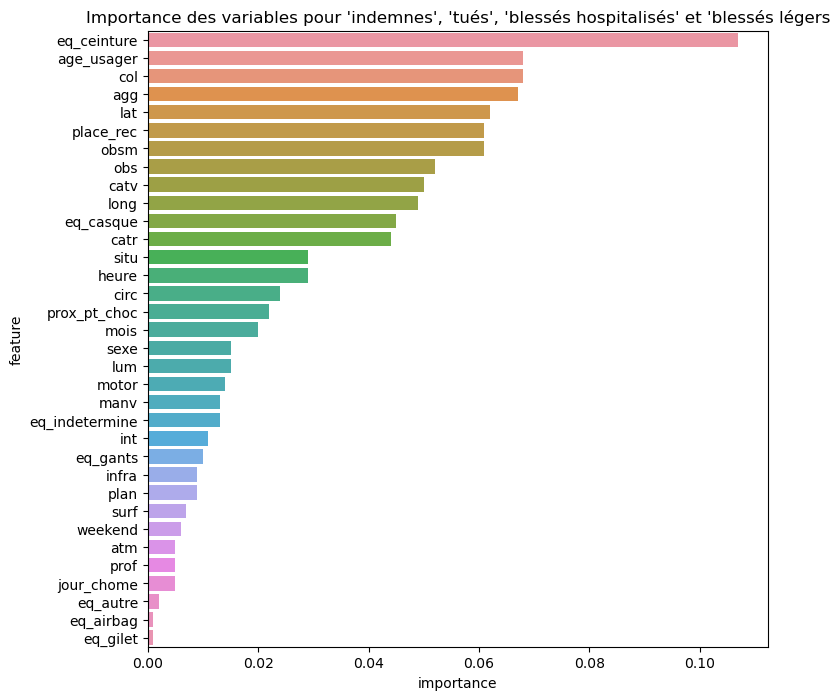

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 8))
sns.barplot(y = importances_best_model.index, x = importances_best_model['importance'])
plt.title("Importance des variables pour 'indemnes', 'tués', 'blessés hospitalisés' et 'blessés légers")
plt.show()

### Interprétation avec SHAP

In [16]:
import shap

explainer = shap.TreeExplainer(best_model)

shap_values = explainer.shap_values(X_test_rf)

print('Expected Value:', explainer.expected_value)

Expected Value: [0.2502134  0.24976206 0.2501707  0.24985384]


In [ ]:
print(shap_values.shape)
print(type(shap_values))
print(shap_values[0].shape)
print(shap_values[1].shape)

(111784, 34, 4)
<class 'numpy.ndarray'>
(34, 4)
(34, 4)


Attention 4 classes !!!!

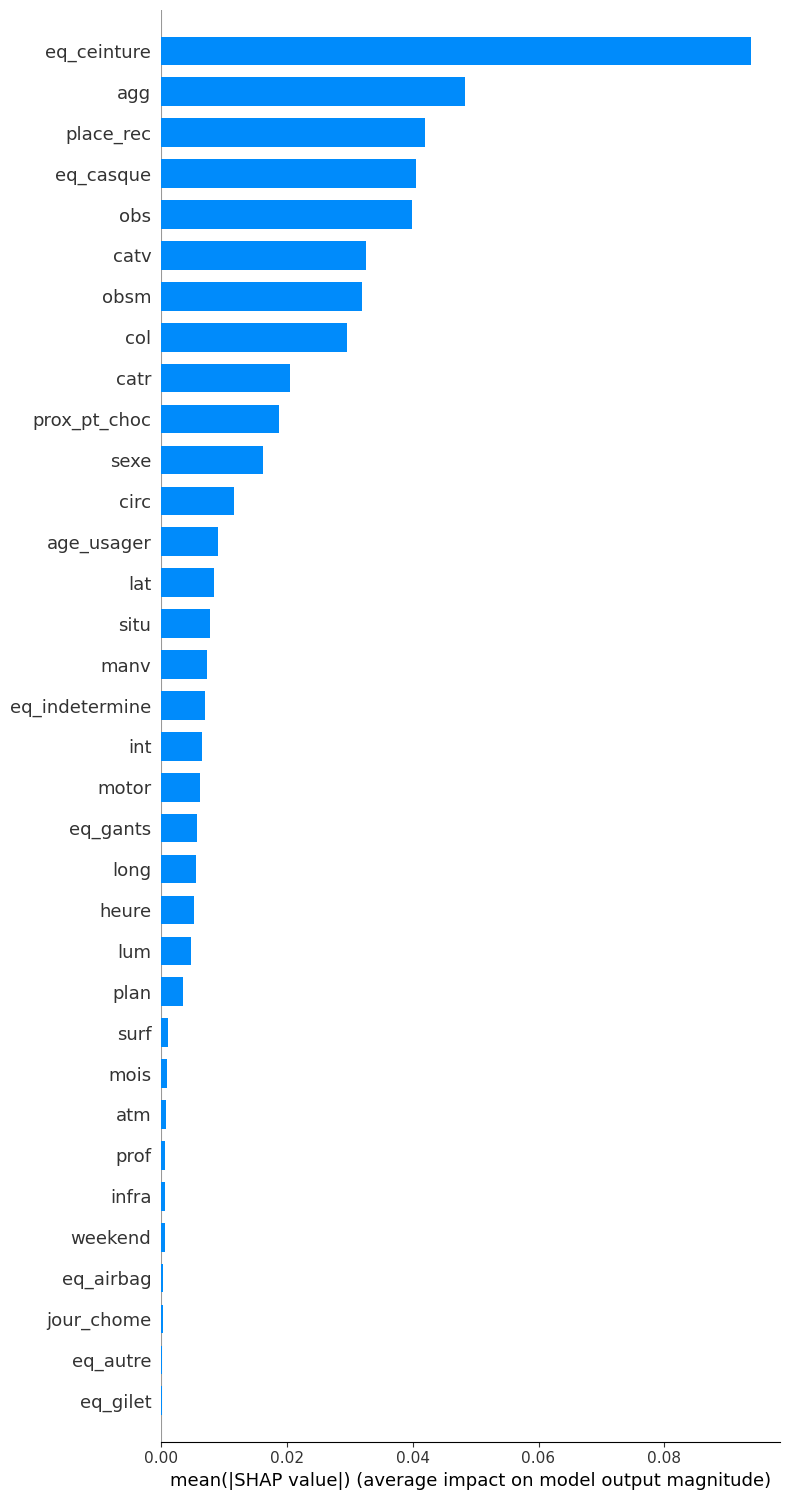

In [233]:
# Pour les 'indemnes'
shap.summary_plot(shap_values[:, :, 0], X_test_rf, plot_type="bar", max_display = len(X_test_rf))

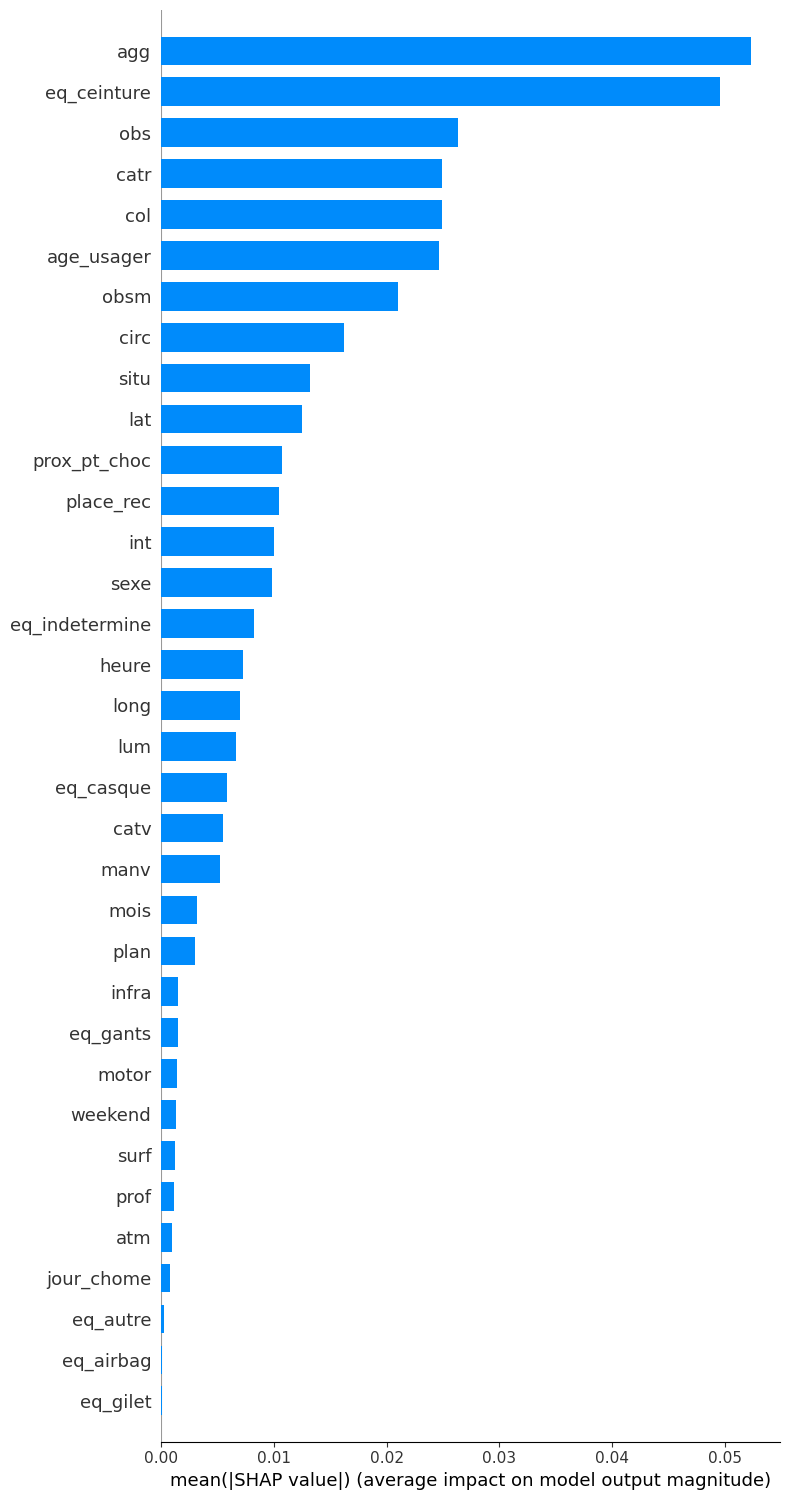

In [234]:
# Pour les 'tués'
shap.summary_plot(shap_values[:, :, 1], X_test_rf, plot_type="bar", max_display = len(X_test_rf))

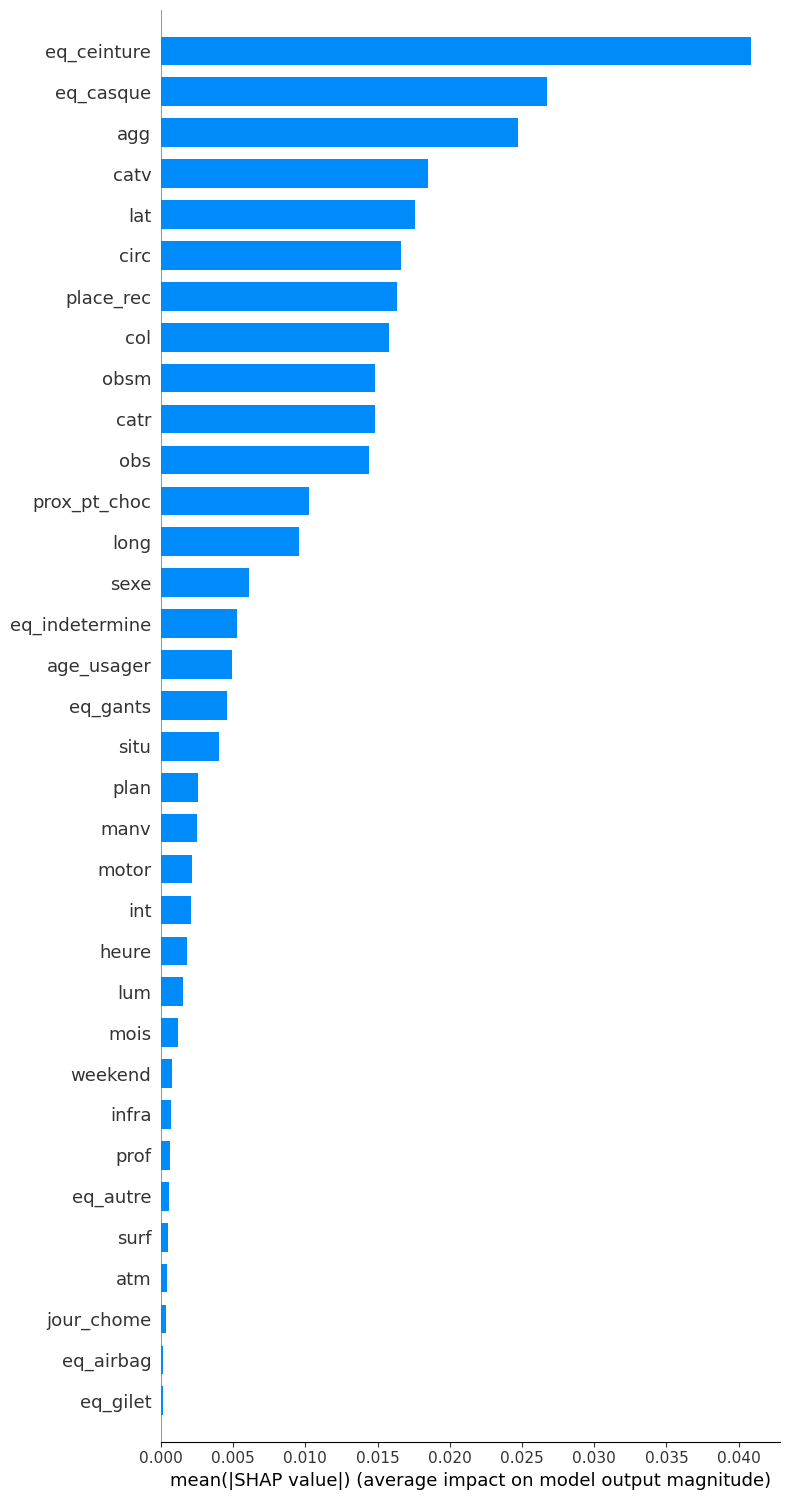

In [235]:
# Pour les 'blessés hospitalisés'
shap.summary_plot(shap_values[:, :, 2], X_test_rf, plot_type="bar", max_display = len(X_test_rf))

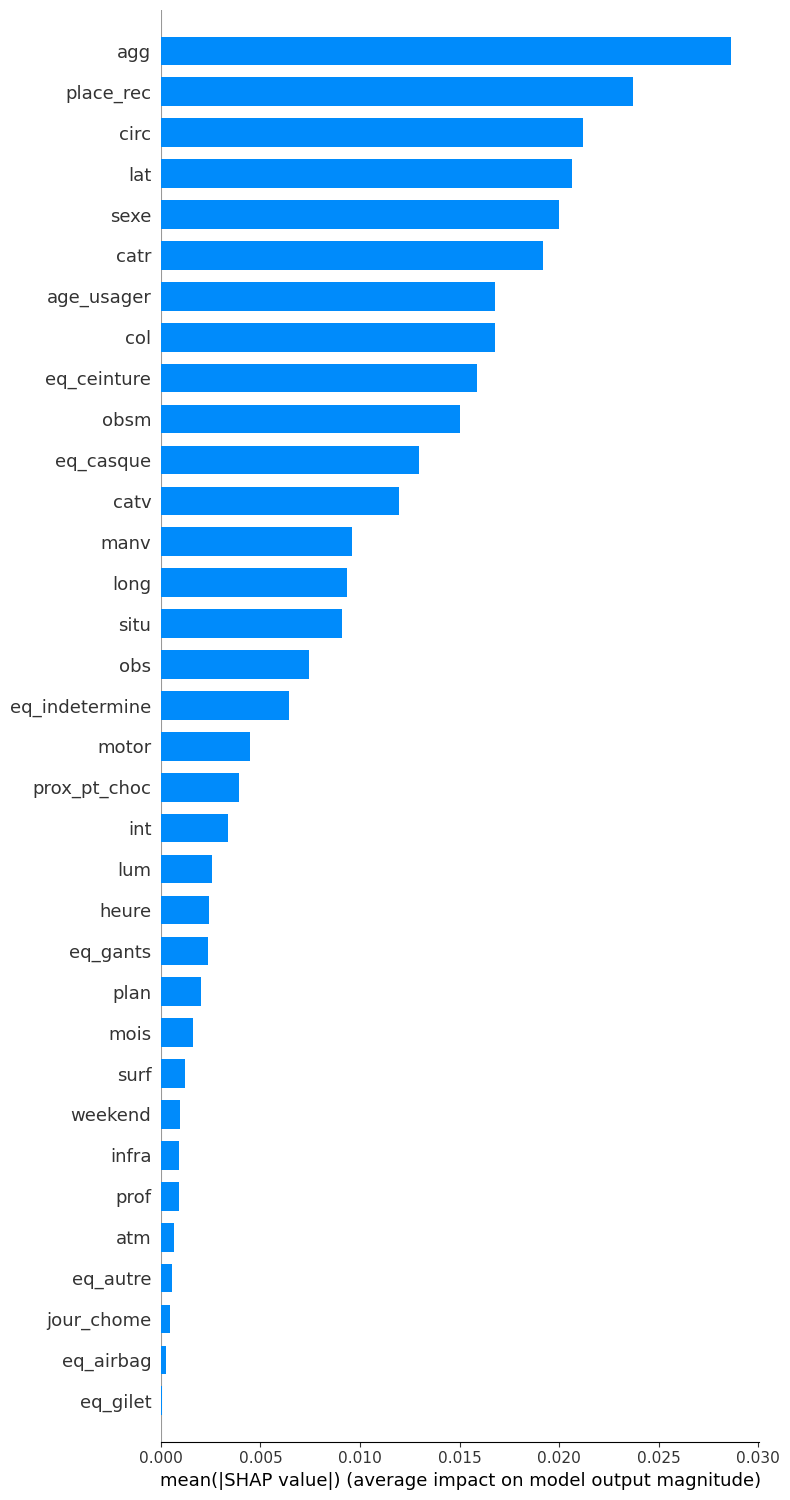

In [236]:
# Pour les 'blessés légers'
shap.summary_plot(shap_values[:, :, 3], X_test_rf, plot_type="bar", max_display = len(X_test_rf))

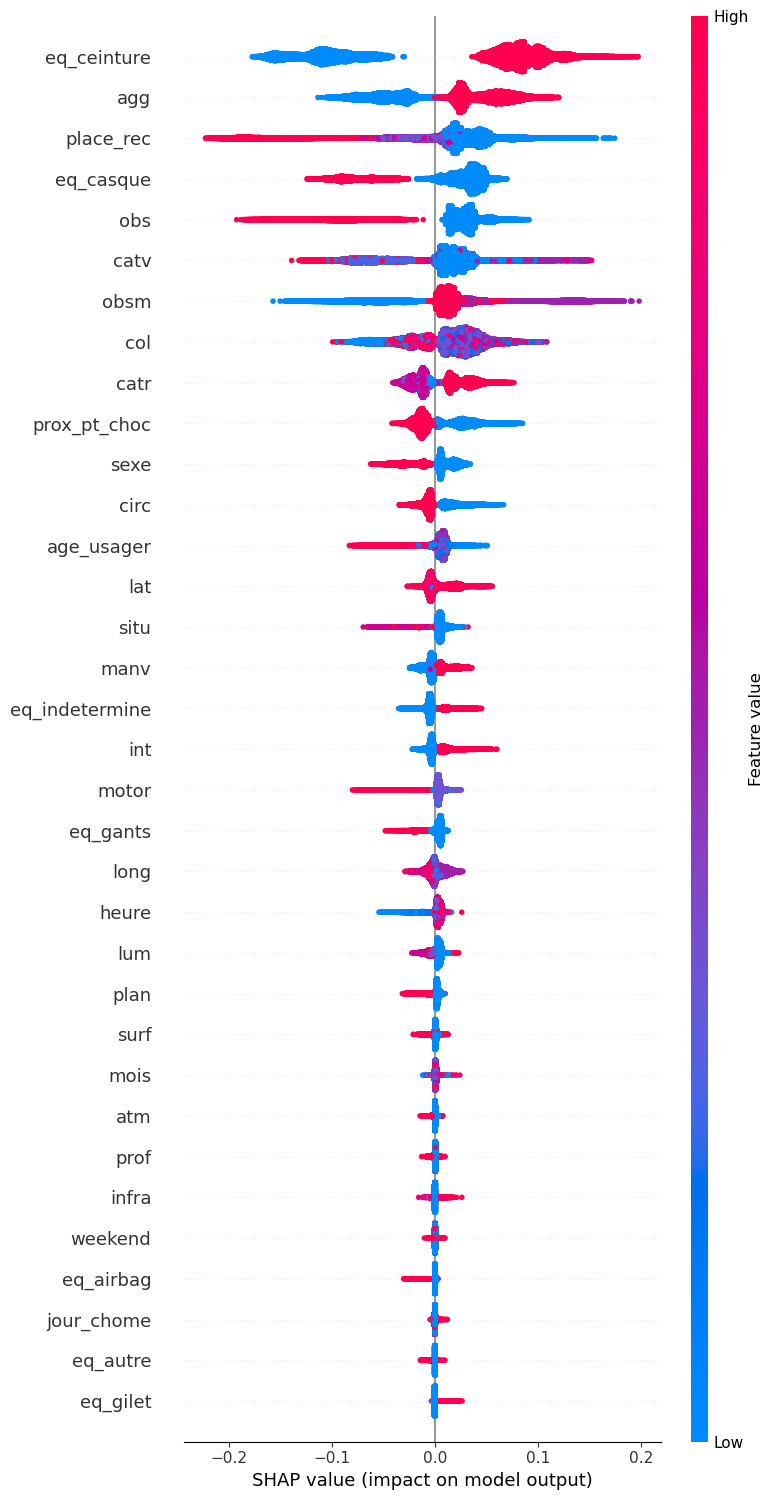

In [237]:
# Pour les 'indemnes'
shap.summary_plot(shap_values[:, :, 0], X_test_rf, max_display = len(X_test_rf))

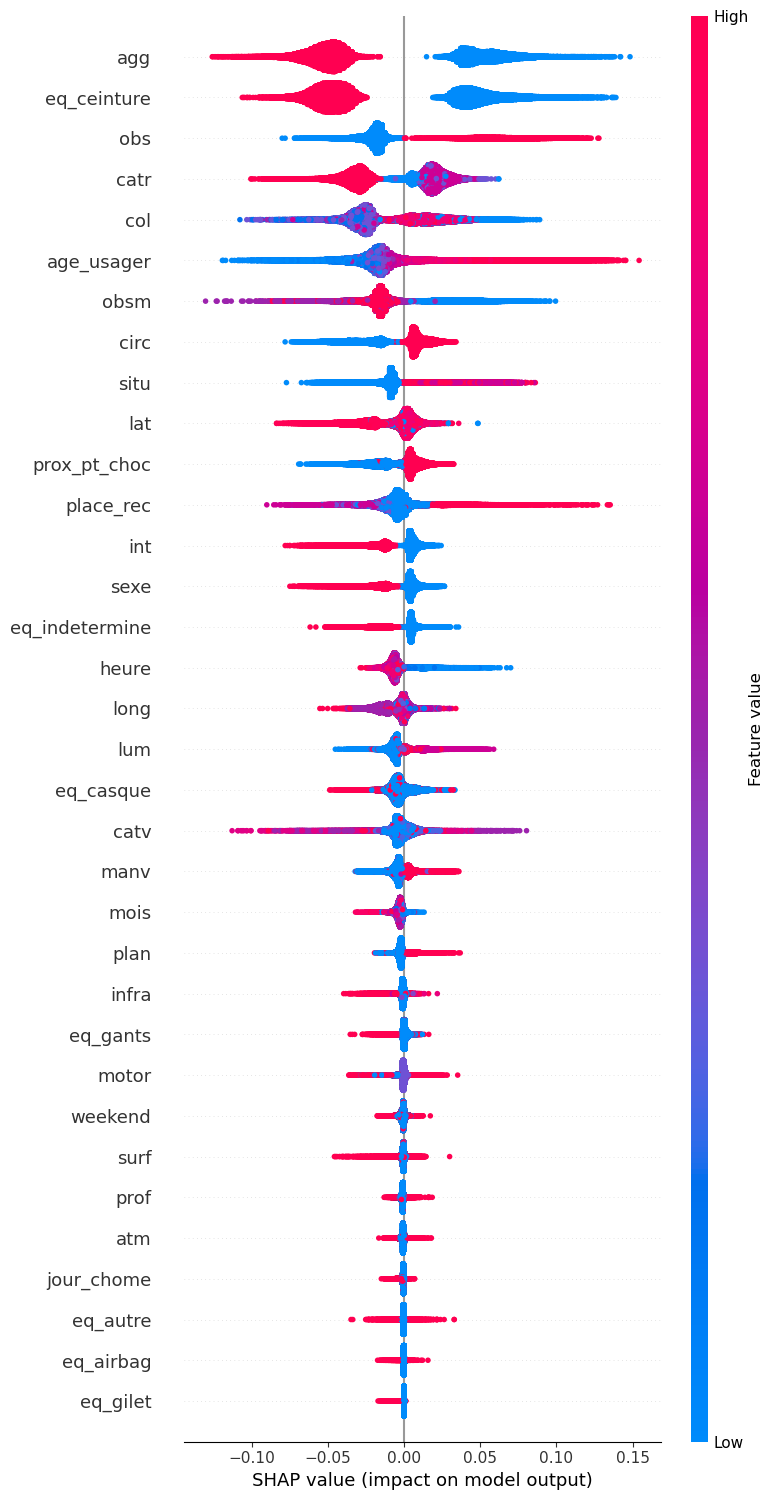

In [238]:
# Pour les 'tués'
shap.summary_plot(shap_values[:, :, 1], X_test_rf, max_display = len(X_test_rf))

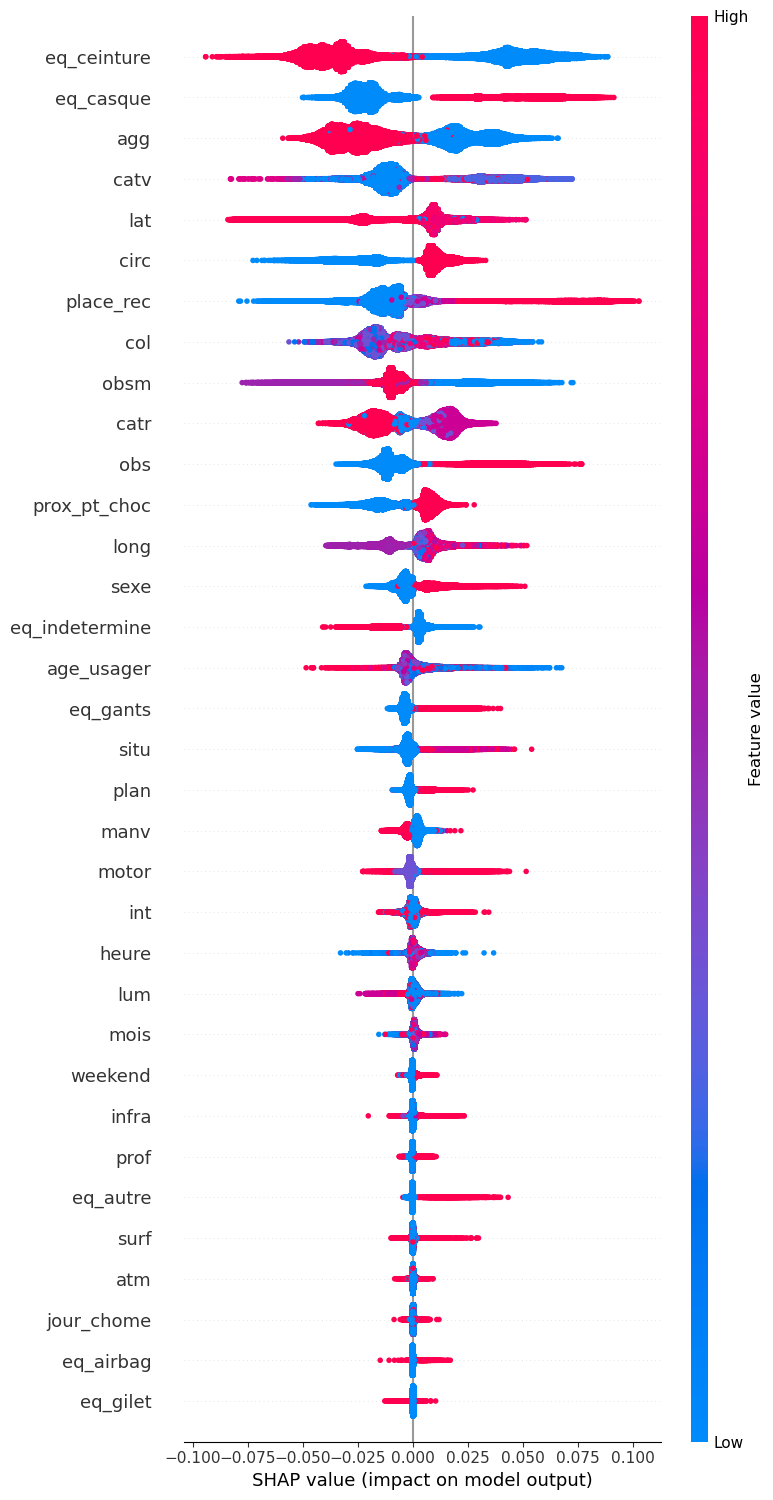

In [239]:
# Pour les 'blessés hospitalisés'
shap.summary_plot(shap_values[:, :, 2], X_test_rf, max_display = len(X_test_rf))

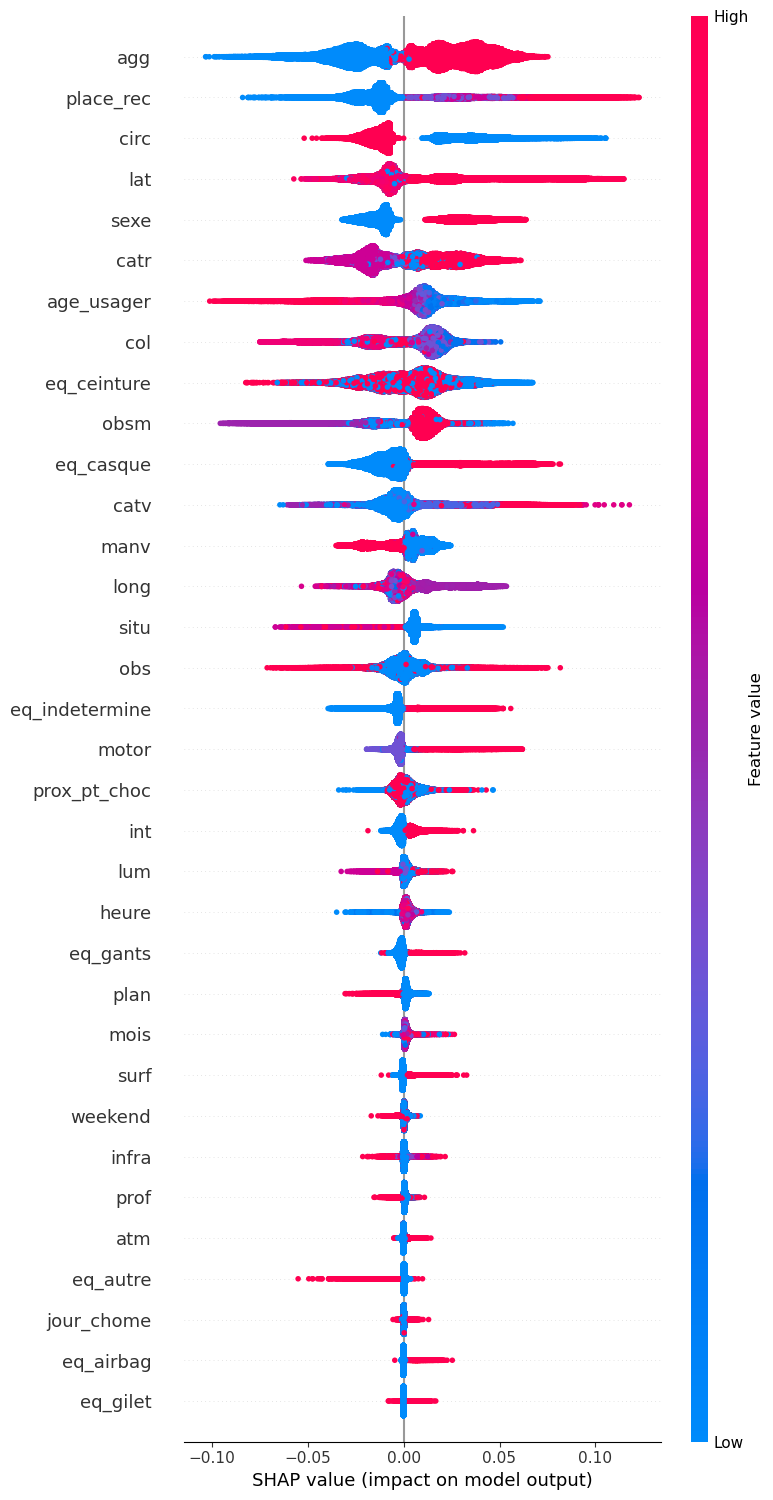

In [240]:
# Pour les 'blessés légers'
shap.summary_plot(shap_values[:, :, 3], X_test_rf, max_display = len(X_test_rf))

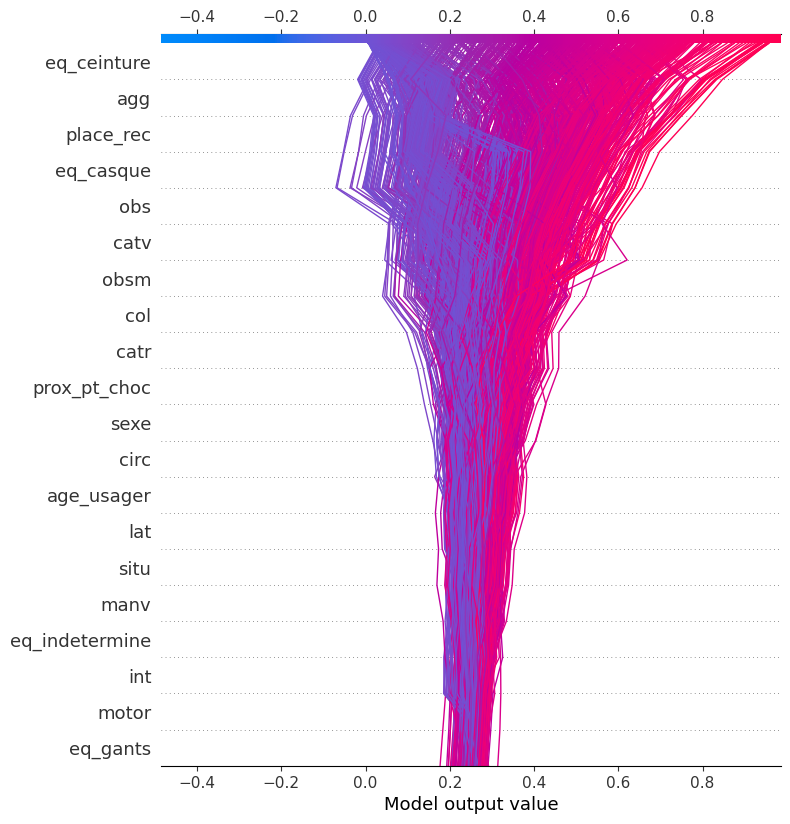

In [161]:
# détermination des variables qui contribuent au label 'indemnes'
shap.decision_plot(explainer.expected_value[0], shap_values[0:1000, :, 0], X_test_rf.columns)

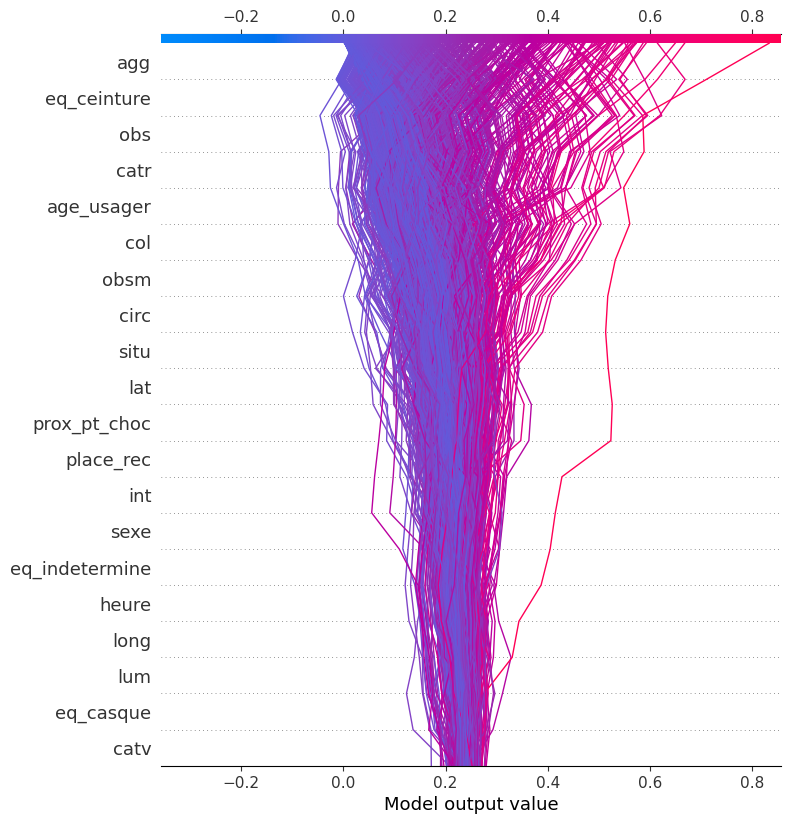

In [162]:
# détermination des variables qui contribuent au label 'tués'
shap.decision_plot(explainer.expected_value[1], shap_values[0:1000, :, 1], X_test_rf.columns)

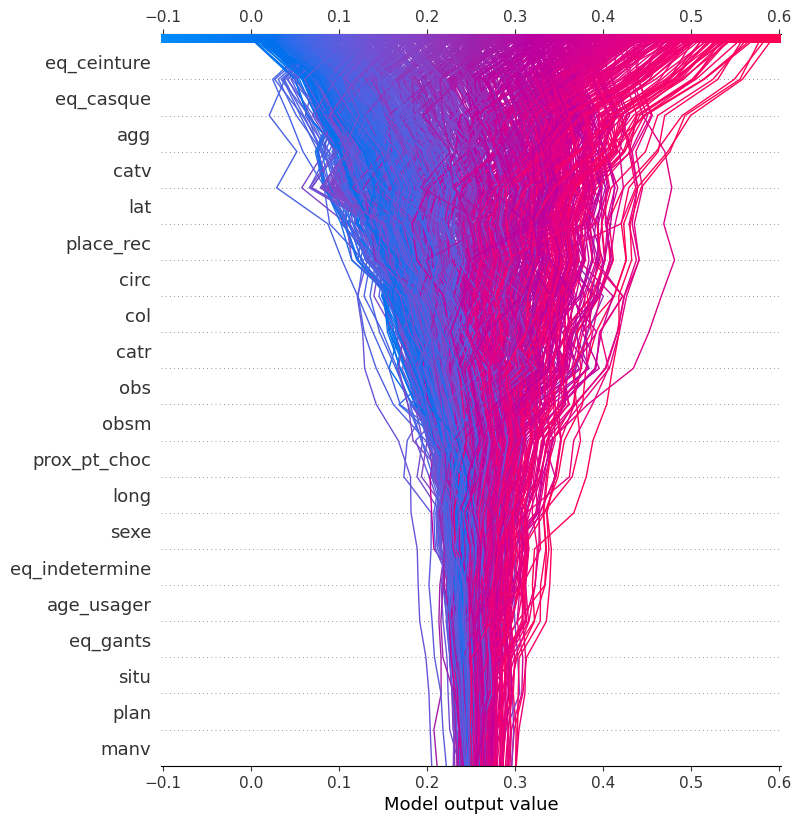

In [168]:
# détermination des variables qui contribuent au label 'blessés hospitalisés'
shap.decision_plot(explainer.expected_value[1], shap_values[0:1000, :, 2], X_test_rf.columns)

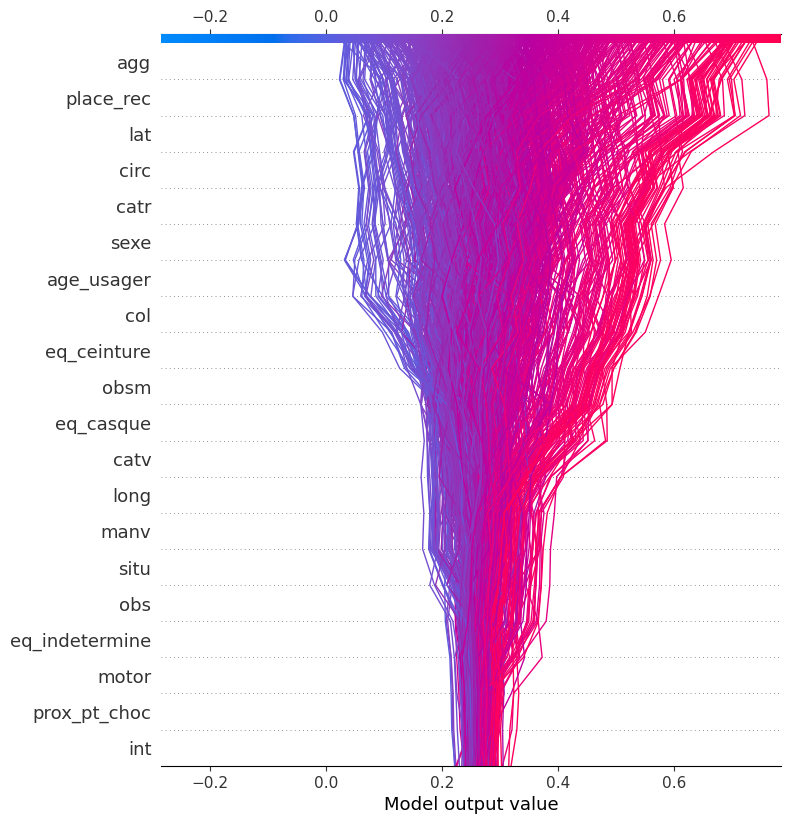

In [169]:
# détermination des variables qui contribuent au label 'blessés légers'
shap.decision_plot(explainer.expected_value[1], shap_values[0:1000, :, 3], X_test_rf.columns)

# Réentrainement avec changement de l'ordre des modalités de 'grav' pour l'affichage streamlit

In [26]:
y_train

135492    4
61030     4
97417     4
464936    3
256701    4
         ..
181495    3
453088    3
164103    4
172847    2
463162    1
Name: grav, Length: 335352, dtype: int64

In [27]:
# Modification de l'odre des modalités de 'grav' : 0 - indemenes, 1 - blessés légers, 2 - blessés hospitalisés, 3 - tués
y_train = y_train.replace([1, 2, 3, 4], ['ind', 'tue', 'bh', 'bl'])
y_train = y_train.replace(['ind', 'tue', 'bh', 'bl'], [0, 3, 2, 1])

y_test = y_test.replace([1, 2, 3, 4], ['ind', 'tue', 'bh', 'bl'])
y_test = y_test.replace(['ind', 'tue', 'bh', 'bl'], [0, 3, 2, 1])

In [29]:
y_train

135492    1
61030     1
97417     1
464936    2
256701    1
         ..
181495    2
453088    2
164103    1
172847    3
463162    0
Name: grav, Length: 335352, dtype: int64

In [30]:
# Variables retenues lors de l'entraînement du modèle brut
liste_var_rf = ['lat', 'age_usager', 'long', 'heure', 'mois', 'eq_ceinture', 'col',
       'place_rec', 'obsm', 'catv', 'catr', 'eq_casque', 'manv', 'lum',
       'motor', 'obs', 'sexe', 'agg', 'infra', 'weekend', 'jour_chome',
       'prox_pt_choc', 'prof', 'situ', 'circ', 'eq_indetermine', 'surf', 'int',
       'atm', 'plan', 'eq_gants', 'eq_airbag', 'eq_gilet', 'eq_autre']
X_train_rf = X_train[liste_var_rf]
X_test_rf = X_test[liste_var_rf]

In [31]:
best_model = RandomForestClassifier(bootstrap = True, 
                                    class_weight = 'balanced', 
                                    criterion = 'entropy', 
                                    max_depth = 13, 
                                    min_samples_leaf = 1, 
                                    min_samples_split = 2, 
                                    n_estimators = 100, 
                                    n_jobs = -1, 
                                    random_state = 42).fit(X_train_rf, y_train)

y_train_pred = best_model.predict(X_train_rf)
y_test_pred = best_model.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 65.56 %
Test acuracy :  61.28 %

Matrice de confusion :


Classes prédites,0,1,2,3
Classes réelles,,,,
0,39232,3311,2324,1270
1,14663,19252,8909,2273
2,2220,3165,8531,3584
3,282,270,1010,1488



Rapport de classification :
               precision    recall  f1-score   support

           0       0.70      0.85      0.77     46137
           1       0.74      0.43      0.54     45097
           2       0.41      0.49      0.45     17500
           3       0.17      0.49      0.26      3050

    accuracy                           0.61    111784
   macro avg       0.50      0.56      0.50    111784
weighted avg       0.65      0.61      0.61    111784



In [32]:
joblib.dump(best_model, "../../../data/saved_models/RandomForest_4classes.joblib")

['../../../data/saved_models/RandomForest_4classes.joblib']